In [6]:
!pip install scikit-image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout,BatchNormalization,Embedding,TimeDistributed
from tensorflow.keras.layers import Conv2D,MaxPooling2D,ReLU,Concatenate,concatenate
from tensorflow.keras import regularizers,optimizers,losses
from tensorflow.keras.layers import DepthwiseConv2D,Add,ReLU,GlobalAveragePooling2D,GlobalMaxPooling2D,MultiHeadAttention
from tensorflow.keras.layers import ActivityRegularization,AvgPool2D,Conv2DTranspose
from tensorflow.keras.metrics import Accuracy,Precision,Recall,AUC,TruePositives,TrueNegatives,FalseNegatives,FalsePositives,FalseNegatives,SpecificityAtSensitivity,SensitivityAtSpecificity
from tensorflow.keras.utils import plot_model,to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd 
import matplotlib
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import time
import os
from glob import glob
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
import skimage.io
import skimage.color
import skimage.filters
%matplotlib inline

In [7]:
os.listdir('/kaggle/working')

['.virtual_documents']

In [8]:
images=[]
y=[]
masks=[]

gr_shape=(128,128,1)
img_shape=(128,128,3)
input_dir='/kaggle/input/lidcidri/LIDC-IDRI-slices'
out_dir='/kaggle/working'

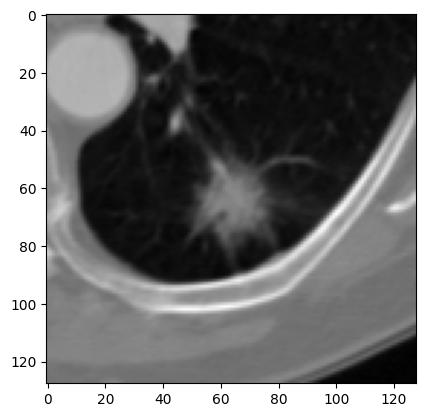

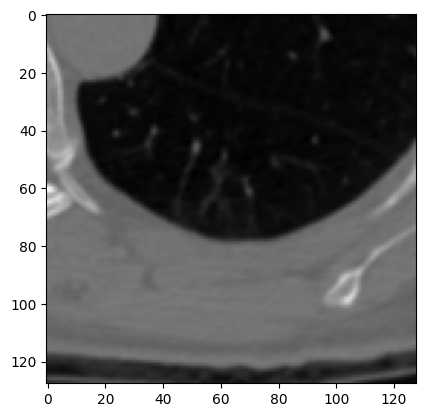

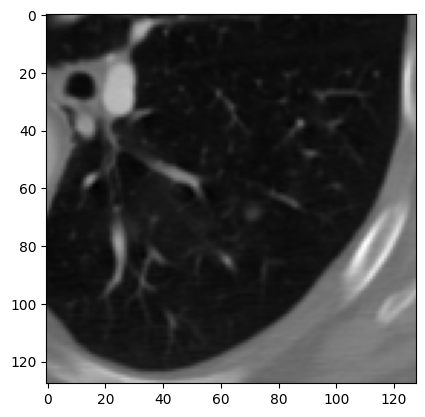

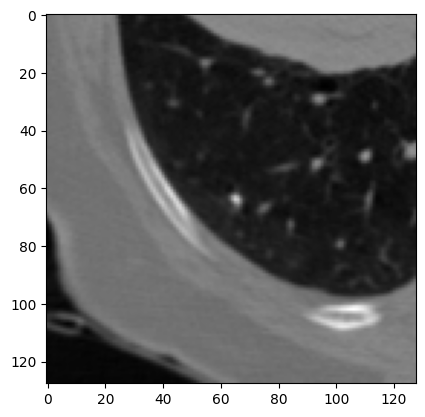

In [9]:
for i in range(1,5):
    img=image.load_img(f'/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-000'+str(i)+'/nodule-0/images/slice-1.png')
    plt.imshow(img)
    plt.show()

In [10]:
print("Shape of Image is : ",np.asarray(img).shape)

Shape of Image is :  (128, 128, 3)


In [11]:
images=[]
y=[]
mask0=[]
mask1=[]
mask2=[]
mask3=[]
base_path='/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001'

for nodule in os.listdir(base_path):
    im='images'
    msk0='mask-0'
    msk1='mask-1'
    msk2='mask-2'
    msk3='mask-3'
    arr=[im,msk0,msk1,msk2,msk3]
    
    for a in arr:
        pattern=os.path.join(base_path,nodule,a,'*.png')
        files=glob(pattern)
        for filename in files:
            print(filename)
            img=image.load_img(filename,target_size=img_shape)
            img=np.asarray(img)
            if(a==im):
                images.append(img)
            elif(a==msk0):
                mask0.append(img)
            elif(a==msk1):
                mask1.append(img)
            elif(a==msk2):
                mask2.append(img)
            elif(a==msk3):
                mask3.append(img)


/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-6.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-7.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-4.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-2.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-8.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-3.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-5.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-0.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images/slice-1.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0/slice-6.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0/slice-7.png
/kaggle/input/lidcidri/LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0/slice-4.png
/kag

In [12]:
i=5
print(mask0[i].sum())
print(mask1[i].sum())
print(mask2[i].sum())
print(mask3[i].sum())


710685
688500
684675
681615


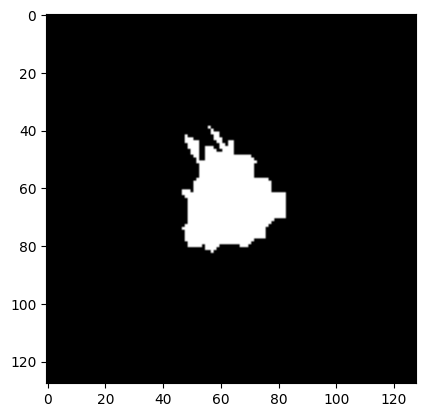

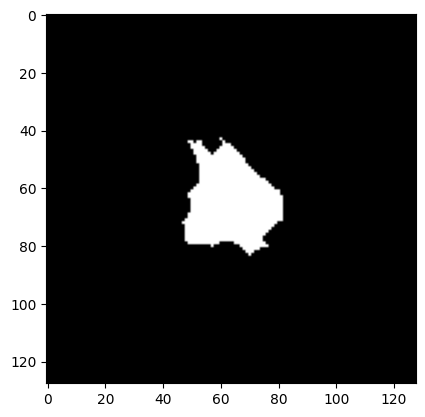

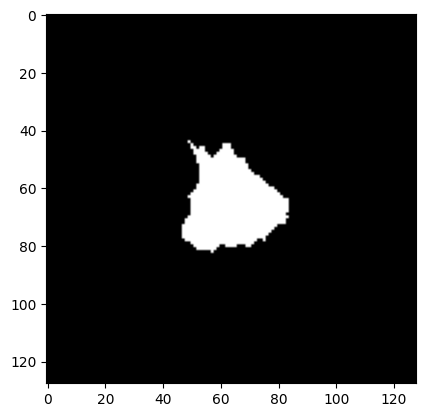

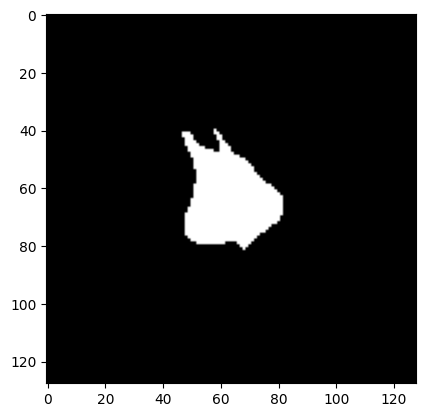

In [13]:
plt.imshow(mask0[i])
plt.show()

plt.imshow(mask1[i])
plt.show()

plt.imshow(mask2[i])
plt.show()

plt.imshow(mask3[i])
plt.show()

In [14]:
gr_shape=(128,128,1)
img_shape = (128,128,3)
input_dir="/kaggle/input/lidcidri/LIDC-IDRI-slices"
images=[]
masks=[]
y=[]

# Input from LIDC Data on kaggle

In [15]:
Thres = 5000 / 255
images = []
y = []
masks = []
input_dir = '/kaggle/input/lidcidri/LIDC-IDRI-slices'

for patient in os.listdir(input_dir):
    if len(images) > 2000:
        break
    for nodule in os.listdir(os.path.join(input_dir, patient)):
        mask_paths = {
            'mask-0': [],
            'mask-1': [],
            'mask-2': [],
            'mask-3': []
        }
        # Load images
        for filename in glob(os.path.join(input_dir, patient, nodule, 'images', '*.png')):
            img = image.load_img(filename, target_size=img_shape)
            img = np.asarray(img)
            images.append(img)
        # Load masks
        for mask_type in mask_paths.keys():
            for filename in glob(os.path.join(input_dir, patient, nodule, mask_type, '*.png')):
                img = image.load_img(filename, target_size=img_shape)
                img = np.asarray(img)
                mask_paths[mask_type].append(img)
        # Process masks
        for i in range(len(mask_paths['mask-0'])):
            white_sum = np.array([mask_paths['mask-0'][i].sum(), mask_paths['mask-1'][i].sum(),
                                  mask_paths['mask-2'][i].sum(), mask_paths['mask-3'][i].sum()])
            cnt = np.sum(white_sum > Thres)
            if cnt > 2:
                y.append(1)
                max_index = max(range(4), key=white_sum.__getitem__)
                masks.append(mask_paths[f'mask-{max_index}'][i])
            else:
                y.append(0)
                min_index = min(range(4), key=white_sum.__getitem__)
                masks.append(mask_paths[f'mask-{min_index}'][i])


In [16]:
images=np.array(images)/255
masks=np.array(masks)/255
label=np.array(y)

print(images.shape)
print(masks.shape)
print(label.shape)

(2007, 128, 128, 3)
(2007, 128, 128, 3)
(2007,)


In [17]:
images1=images[:2000]
masks1=masks[:2000]
label1=label[:2000]

In [18]:
print(images1.shape)
print(masks1.shape)
print(label1.shape)

(2000, 128, 128, 3)
(2000, 128, 128, 3)
(2000,)


In [19]:
x_train,x_test,y_train,y_test,mask_train,mask_test = train_test_split(images1,label1,masks1,train_size=0.8, random_state=7)
print(x_train.shape)
print(mask_train.shape)

(1600, 128, 128, 3)
(1600, 128, 128, 3)


# FedAvg

13/13 [==============================] - 5s 76ms/step
Client: client_2 | comm_round: 0 | local_acc: 52.000% | local_loss: 0.74093
Precision: 1.000 | Recall: 0.000 | F1 Score: 0.000
Confusion Matrix:
[[208   0]
 [192   0]]
13/13 [==============================] - 4s 84ms/step
Client: client_4 | comm_round: 0 | local_acc: 48.000% | local_loss: 0.76156
Precision: 0.480 | Recall: 1.000 | F1 Score: 0.649
Confusion Matrix:
[[  0 208]
 [  0 192]]
13/13 [==============================] - 4s 84ms/step
Client: client_1 | comm_round: 0 | local_acc: 44.500% | local_loss: 0.86692
Precision: 0.412 | Recall: 0.365 | F1 Score: 0.387
Confusion Matrix:
[[108 100]
 [122  70]]
13/13 [==============================] - 4s 86ms/step
Client: client_3 | comm_round: 0 | local_acc: 50.000% | local_loss: 0.91811
Precision: 0.489 | Recall: 0.927 | F1 Score: 0.640
Confusion Matrix:
[[ 22 186]
 [ 14 178]]
13/13 [==============================] - 4s 81ms/step
Client: GLOBAL | comm_round: 0 | global_acc: 52.000% | glo

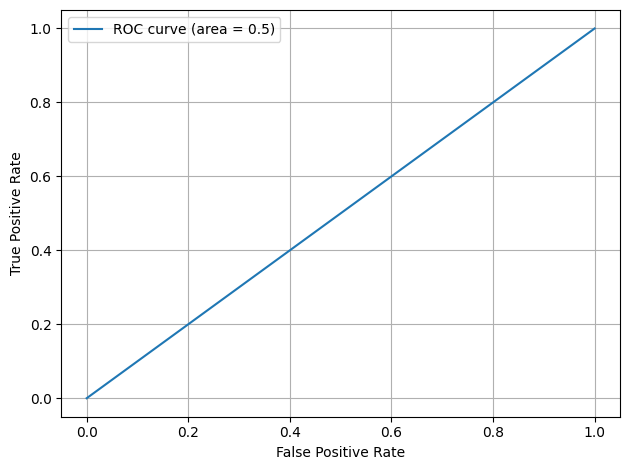

13/13 [==============================] - 4s 85ms/step
Client: client_2 | comm_round: 1 | local_acc: 50.250% | local_loss: 1.67312
Precision: 0.316 | Recall: 0.031 | F1 Score: 0.057
Confusion Matrix:
[[195  13]
 [186   6]]
13/13 [==============================] - 4s 87ms/step
Client: client_4 | comm_round: 1 | local_acc: 68.500% | local_loss: 1.38090
Precision: 0.824 | Recall: 0.438 | F1 Score: 0.571
Confusion Matrix:
[[190  18]
 [108  84]]
13/13 [==============================] - 4s 85ms/step
Client: client_3 | comm_round: 1 | local_acc: 50.750% | local_loss: 1.53030
Precision: 0.493 | Recall: 0.984 | F1 Score: 0.657
Confusion Matrix:
[[ 14 194]
 [  3 189]]
13/13 [==============================] - 4s 86ms/step
Client: client_1 | comm_round: 1 | local_acc: 75.500% | local_loss: 1.45290
Precision: 0.753 | Recall: 0.729 | F1 Score: 0.741
Confusion Matrix:
[[162  46]
 [ 52 140]]
13/13 [==============================] - 2s 80ms/step
Client: GLOBAL | comm_round: 1 | global_acc: 69.250% | glo

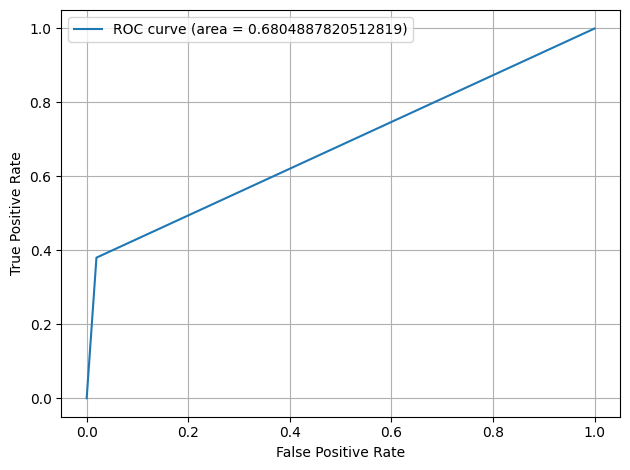

13/13 [==============================] - 4s 83ms/step
Client: client_4 | comm_round: 2 | local_acc: 52.000% | local_loss: 1.49928
Precision: 0.500 | Recall: 0.089 | F1 Score: 0.150
Confusion Matrix:
[[191  17]
 [175  17]]
13/13 [==============================] - 4s 86ms/step
Client: client_1 | comm_round: 2 | local_acc: 48.000% | local_loss: 1.44020
Precision: 0.480 | Recall: 0.984 | F1 Score: 0.645
Confusion Matrix:
[[  3 205]
 [  3 189]]
13/13 [==============================] - 4s 83ms/step
Client: client_3 | comm_round: 2 | local_acc: 73.250% | local_loss: 1.77338
Precision: 0.667 | Recall: 0.885 | F1 Score: 0.761
Confusion Matrix:
[[123  85]
 [ 22 170]]
13/13 [==============================] - 4s 83ms/step
Client: client_2 | comm_round: 2 | local_acc: 52.250% | local_loss: 0.97051
Precision: 1.000 | Recall: 0.005 | F1 Score: 0.010
Confusion Matrix:
[[208   0]
 [191   1]]
13/13 [==============================] - 2s 81ms/step
Client: GLOBAL | comm_round: 2 | global_acc: 83.500% | glo

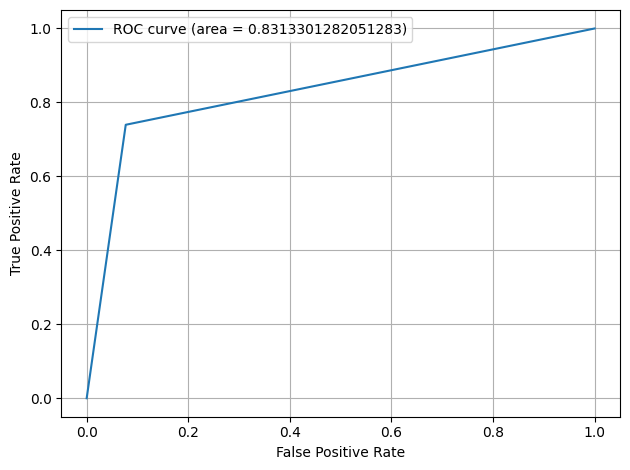

13/13 [==============================] - 4s 86ms/step
Client: client_3 | comm_round: 3 | local_acc: 48.000% | local_loss: 1.23923
Precision: 0.480 | Recall: 0.995 | F1 Score: 0.647
Confusion Matrix:
[[  1 207]
 [  1 191]]
13/13 [==============================] - 4s 86ms/step
Client: client_1 | comm_round: 3 | local_acc: 58.750% | local_loss: 1.92079
Precision: 0.541 | Recall: 0.932 | F1 Score: 0.685
Confusion Matrix:
[[ 56 152]
 [ 13 179]]
13/13 [==============================] - 5s 86ms/step
Client: client_2 | comm_round: 3 | local_acc: 75.250% | local_loss: 2.12092
Precision: 0.800 | Recall: 0.646 | F1 Score: 0.715
Confusion Matrix:
[[177  31]
 [ 68 124]]
13/13 [==============================] - 4s 84ms/step
Client: client_4 | comm_round: 3 | local_acc: 50.250% | local_loss: 0.93358
Precision: 0.477 | Recall: 0.385 | F1 Score: 0.427
Confusion Matrix:
[[127  81]
 [118  74]]
13/13 [==============================] - 2s 80ms/step
Client: GLOBAL | comm_round: 3 | global_acc: 85.250% | glo

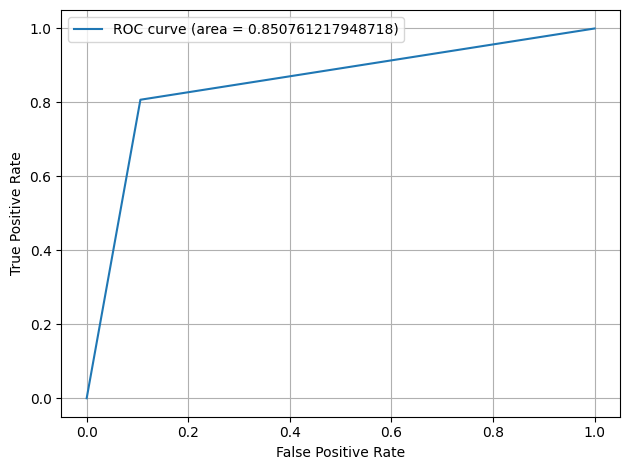

13/13 [==============================] - 4s 85ms/step
Client: client_3 | comm_round: 4 | local_acc: 49.250% | local_loss: 2.27981
Precision: 0.486 | Recall: 0.990 | F1 Score: 0.652
Confusion Matrix:
[[  7 201]
 [  2 190]]
13/13 [==============================] - 4s 85ms/step
Client: client_1 | comm_round: 4 | local_acc: 48.000% | local_loss: 2.19122
Precision: 0.480 | Recall: 1.000 | F1 Score: 0.649
Confusion Matrix:
[[  0 208]
 [  0 192]]
13/13 [==============================] - 4s 85ms/step
Client: client_2 | comm_round: 4 | local_acc: 80.250% | local_loss: 2.31405
Precision: 0.790 | Recall: 0.802 | F1 Score: 0.796
Confusion Matrix:
[[167  41]
 [ 38 154]]
13/13 [==============================] - 4s 85ms/step
Client: client_4 | comm_round: 4 | local_acc: 77.500% | local_loss: 1.75900
Precision: 0.718 | Recall: 0.875 | F1 Score: 0.789
Confusion Matrix:
[[142  66]
 [ 24 168]]
13/13 [==============================] - 2s 82ms/step
Client: GLOBAL | comm_round: 4 | global_acc: 84.500% | glo

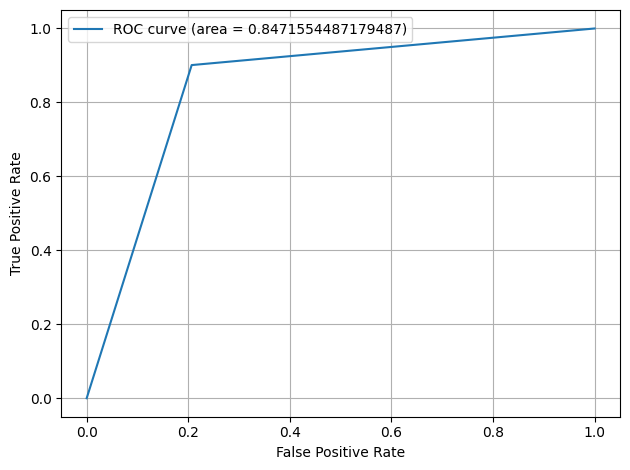

13/13 [==============================] - 4s 83ms/step
Client: client_1 | comm_round: 5 | local_acc: 45.250% | local_loss: 1.50329
Precision: 0.345 | Recall: 0.156 | F1 Score: 0.215
Confusion Matrix:
[[151  57]
 [162  30]]
13/13 [==============================] - 4s 86ms/step
Client: client_2 | comm_round: 5 | local_acc: 78.250% | local_loss: 2.23338
Precision: 0.784 | Recall: 0.755 | F1 Score: 0.769
Confusion Matrix:
[[168  40]
 [ 47 145]]
13/13 [==============================] - 4s 85ms/step
Client: client_4 | comm_round: 5 | local_acc: 74.250% | local_loss: 1.37324
Precision: 0.721 | Recall: 0.755 | F1 Score: 0.738
Confusion Matrix:
[[152  56]
 [ 47 145]]
13/13 [==============================] - 4s 85ms/step
Client: client_3 | comm_round: 5 | local_acc: 51.750% | local_loss: 1.67768
Precision: 0.499 | Recall: 0.974 | F1 Score: 0.660
Confusion Matrix:
[[ 20 188]
 [  5 187]]
13/13 [==============================] - 2s 80ms/step
Client: GLOBAL | comm_round: 5 | global_acc: 85.000% | glo

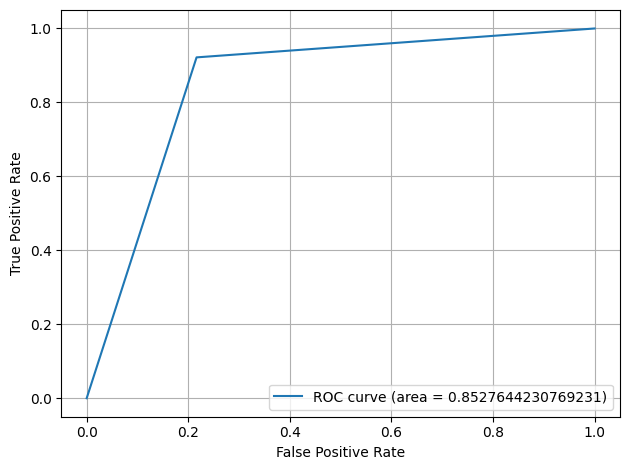

13/13 [==============================] - 4s 86ms/step
Client: client_4 | comm_round: 6 | local_acc: 70.250% | local_loss: 1.64176
Precision: 0.658 | Recall: 0.792 | F1 Score: 0.719
Confusion Matrix:
[[129  79]
 [ 40 152]]
13/13 [==============================] - 4s 86ms/step
Client: client_2 | comm_round: 6 | local_acc: 64.000% | local_loss: 2.11072
Precision: 0.630 | Recall: 0.604 | F1 Score: 0.617
Confusion Matrix:
[[140  68]
 [ 76 116]]
13/13 [==============================] - 4s 85ms/step
Client: client_3 | comm_round: 6 | local_acc: 67.250% | local_loss: 2.01251
Precision: 0.606 | Recall: 0.911 | F1 Score: 0.728
Confusion Matrix:
[[ 94 114]
 [ 17 175]]
13/13 [==============================] - 4s 83ms/step
Client: client_1 | comm_round: 6 | local_acc: 81.000% | local_loss: 2.65885
Precision: 0.826 | Recall: 0.766 | F1 Score: 0.795
Confusion Matrix:
[[177  31]
 [ 45 147]]
13/13 [==============================] - 2s 79ms/step
Client: GLOBAL | comm_round: 6 | global_acc: 87.500% | glo

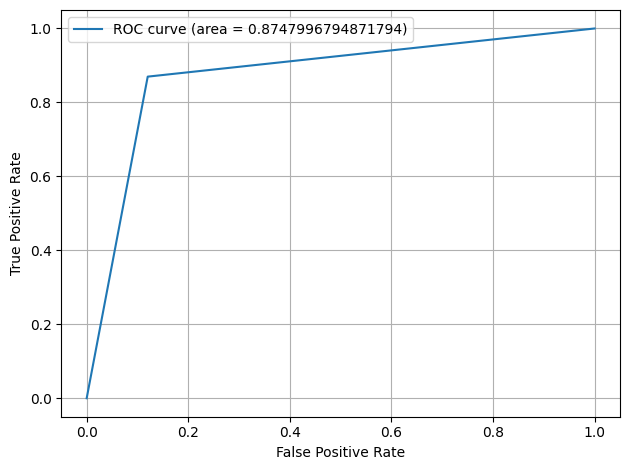

13/13 [==============================] - 4s 83ms/step
Client: client_4 | comm_round: 7 | local_acc: 81.500% | local_loss: 2.53572
Precision: 0.781 | Recall: 0.854 | F1 Score: 0.816
Confusion Matrix:
[[162  46]
 [ 28 164]]
13/13 [==============================] - 4s 83ms/step
Client: client_2 | comm_round: 7 | local_acc: 83.250% | local_loss: 2.70355
Precision: 0.799 | Recall: 0.870 | F1 Score: 0.833
Confusion Matrix:
[[166  42]
 [ 25 167]]
13/13 [==============================] - 4s 85ms/step
Client: client_3 | comm_round: 7 | local_acc: 82.750% | local_loss: 2.60419
Precision: 0.907 | Recall: 0.714 | F1 Score: 0.799
Confusion Matrix:
[[194  14]
 [ 55 137]]
13/13 [==============================] - 4s 84ms/step
Client: client_1 | comm_round: 7 | local_acc: 64.750% | local_loss: 2.15252
Precision: 0.593 | Recall: 0.844 | F1 Score: 0.697
Confusion Matrix:
[[ 97 111]
 [ 30 162]]
13/13 [==============================] - 2s 79ms/step
Client: GLOBAL | comm_round: 7 | global_acc: 86.250% | glo

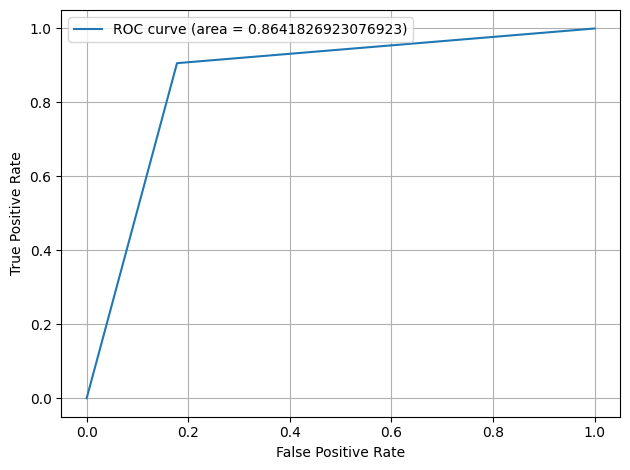

13/13 [==============================] - 4s 82ms/step
Client: client_2 | comm_round: 8 | local_acc: 79.250% | local_loss: 2.70795
Precision: 0.804 | Recall: 0.750 | F1 Score: 0.776
Confusion Matrix:
[[173  35]
 [ 48 144]]
13/13 [==============================] - 4s 85ms/step
Client: client_1 | comm_round: 8 | local_acc: 50.250% | local_loss: 1.49618
Precision: 0.182 | Recall: 0.010 | F1 Score: 0.020
Confusion Matrix:
[[199   9]
 [190   2]]
13/13 [==============================] - 4s 86ms/step
Client: client_4 | comm_round: 8 | local_acc: 51.500% | local_loss: 2.48883
Precision: 0.497 | Recall: 0.943 | F1 Score: 0.651
Confusion Matrix:
[[ 25 183]
 [ 11 181]]
13/13 [==============================] - 4s 88ms/step
Client: client_3 | comm_round: 8 | local_acc: 61.500% | local_loss: 1.43290
Precision: 0.562 | Recall: 0.896 | F1 Score: 0.691
Confusion Matrix:
[[ 74 134]
 [ 20 172]]
13/13 [==============================] - 2s 80ms/step
Client: GLOBAL | comm_round: 8 | global_acc: 83.000% | glo

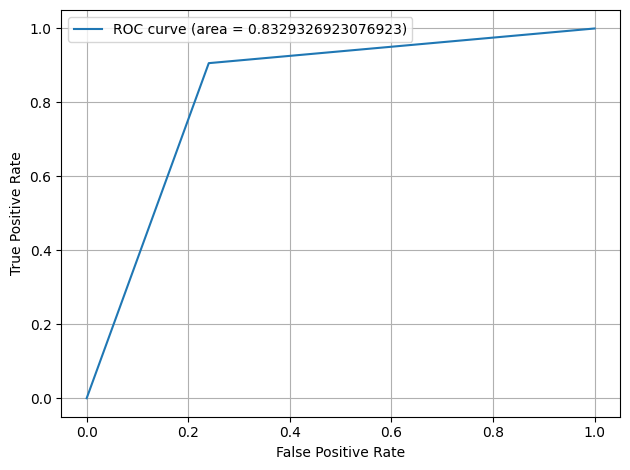

13/13 [==============================] - 4s 86ms/step
Client: client_4 | comm_round: 9 | local_acc: 60.000% | local_loss: 2.06692
Precision: 0.547 | Recall: 0.964 | F1 Score: 0.698
Confusion Matrix:
[[ 55 153]
 [  7 185]]
13/13 [==============================] - 4s 86ms/step
Client: client_2 | comm_round: 9 | local_acc: 81.250% | local_loss: 2.54438
Precision: 0.800 | Recall: 0.812 | F1 Score: 0.806
Confusion Matrix:
[[169  39]
 [ 36 156]]


In [ ]:
import random
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet152V2
import matplotlib.pyplot as plt
import time

final_accuracy_fed_avg=[]
final_loss_fed_avg=[]

# Function to create client data
def create_clients(x, y, num_clients=1, initial='clients'):
    client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]
    data = list(zip(x, y))
    random.shuffle(data)
    size = len(data) // num_clients
    shards = [data[i:i + size] for i in range(0, size*num_clients, size)]
    assert(len(shards) == len(client_names))
    return {client_names[i]: shards[i] for i in range(len(client_names))} 

# Function to batch data
def batch_data(data_shard, bs=10):
    data, label = zip(*data_shard)
    dataset = tf.data.Dataset.from_tensor_slices((list(data), list(label)))
    return dataset.shuffle(len(label)).batch(bs)

# Function to calculate weight scaling factor
def weight_scalling_factor(clients_trn_data, client_name):
    client_names = list(clients_trn_data.keys())
    bs = list(clients_trn_data[client_name])[0][0].shape[0]
    global_count = sum([tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() for client_name in client_names]) * bs
    local_count = tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() * bs
    return local_count / global_count

# Function to scale model weights
def scale_model_weights(weight, scalar):
    return [scalar * w for w in weight]

# Function to sum scaled weights
def sum_scaled_weights(scaled_weight_list):
    return [tf.math.reduce_sum(tensors, axis=0) for tensors in zip(*scaled_weight_list)]

# Function to test model
# Function to test model
def test_model(X_test, Y_test, model, comm_round):
    logits = model.predict(X_test)
    ypred = [1 if x > 0.5 else 0 for x in logits]
    loss = tf.keras.losses.binary_crossentropy(Y_test, logits)
    acc = accuracy_score(Y_test, ypred)
    precision = precision_score(Y_test, ypred, zero_division=1)
    recall = recall_score(Y_test, ypred)
    f1 = f1_score(Y_test, ypred)
    cm = confusion_matrix(Y_test, ypred)
    
    avg_loss = np.mean(loss)  # Calculate the average loss

    print('Client: GLOBAL | comm_round: {} | global_acc: {:.3%} | global_loss: {:.5f}'.format(comm_round, acc, avg_loss))
    print('Precision: {:.3f} | Recall: {:.3f} | F1 Score: {:.3f}'.format(precision, recall, f1))
    print('Confusion Matrix:')
    print(cm)
    
    return acc, avg_loss, ypred, Y_test

def test_model_local(X_test, Y_test, model, comm_round,client):
    logits = model.predict(X_test)
    ypred = [1 if x > 0.5 else 0 for x in logits]
    loss = tf.keras.losses.binary_crossentropy(Y_test, logits)
    acc = accuracy_score(Y_test, ypred)
    precision = precision_score(Y_test, ypred, zero_division=1)
    recall = recall_score(Y_test, ypred)
    f1 = f1_score(Y_test, ypred)
    cm = confusion_matrix(Y_test, ypred)
    
    avg_loss = np.mean(loss)  # Calculate the average loss

    print('Client: {} | comm_round: {} | local_acc: {:.3%} | local_loss: {:.5f}'.format(client,comm_round, acc, avg_loss))
    print('Precision: {:.3f} | Recall: {:.3f} | F1 Score: {:.3f}'.format(precision, recall, f1))
    print('Confusion Matrix:')
    print(cm)
    
    return acc, avg_loss, ypred, Y_test

# Sample data (assuming you have loaded images1 and label1)
x_train, x_test, y_train, y_test = train_test_split(images1, label1, train_size=0.8, random_state=7)

# Create client data and batch it
clients = create_clients(x_train, y_train, num_clients=4, initial='client')
clients_batched = {client_name: batch_data(data) for client_name, data in clients.items()}

# Batch the test set
test_batched = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(len(y_test))


# Define ResNet152V2 class
class ResNet152V2Model:
    @staticmethod
    def build(img_shape=img_shape):
        classifier = ResNet152V2(
                    include_top=False, input_shape=img_shape,
                    weights='imagenet'
                   )
        fine_tune_at = 100
        for layer in classifier.layers[:fine_tune_at]:
            layer.trainable = False

        model = Sequential()
        model.add(classifier)
        model.add(Flatten())
        model.add(BatchNormalization())
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.25))
        model.add(Dense(32, activation='sigmoid'))
        model.add(Dropout(0.25))
        model.add(Dense(1, activation='sigmoid'))
        return model

# Initialize global model
resnet152v2_global = ResNet152V2Model()
global_model = resnet152v2_global.build()

# Commence global training loop
client_accuracies = {client_name: [] for client_name in clients_batched.keys()}
comms_round = 30
times_list = []

for comm_round in range(comms_round):
    start_time = time.time()   
    global_weights = global_model.get_weights()
    scaled_local_weight_list = []

    client_names = list(clients_batched.keys())
    random.shuffle(client_names)
    
    for client in client_names:
        local_model = resnet152v2_global.build()  # Create local model for each client
        adam = Adam(learning_rate=0.001)
        local_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
        local_model.set_weights(global_weights)  

        # Extract data and labels from the client's shard
        client_data = clients[client]
        X = np.array([data[0] for data in client_data])  # Extract data
        Y = np.array([data[1] for data in client_data])  # Extract labels

        local_model.fit(X, Y, epochs=20, batch_size=64, verbose=0)
        acc, _, _, _ = test_model_local(x_test, y_test, local_model, comm_round,client)
        client_accuracies[client].append(acc)
        
        scaling_factor = weight_scalling_factor(clients_batched, client)
        scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
        scaled_local_weight_list.append(scaled_weights)

        tf.keras.backend.clear_session()

    average_weights = sum_scaled_weights(scaled_local_weight_list)
    global_model.set_weights(average_weights)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times_list.append(elapsed_time)
    
    for X_test_batch, y_test_batch in test_batched:
        global_acc, global_loss, ypred, ytest = test_model(X_test_batch, y_test_batch, global_model, comm_round)
        final_accuracy_fed_avg.append(global_acc)
        final_loss_fed_avg.append(global_loss)
        # Plot ROC curve
        fpr, tpr, thresholds = roc_curve(ytest, ypred)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label='ROC curve (area = {})'.format(roc_auc))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # Find the best three clients
best_clients = sorted(client_accuracies, key=lambda x: max(client_accuracies[x]), reverse=True)[:3]

# Plot accuracies of the best three clients
plt.figure(figsize=(10, 6))
for client in best_clients:
    plt.plot(client_accuracies[client], label=client)
    plt.title("Accuracies of Best Three Clients")
    plt.xlabel("Communication Rounds")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# FedAdagrad

13/13 [==============================] - 5s 77ms/step
Client:client_4 | comm_round: 0 | global_acc: 69.000% | global_loss: 1.04770
Precision: 0.619 | Recall: 0.922 | F1 Score: 0.741
Confusion Matrix:
[[ 99 109]
 [ 15 177]]
13/13 [==============================] - 4s 85ms/step
Client:client_2 | comm_round: 0 | global_acc: 61.750% | global_loss: 1.05447
Precision: 0.563 | Recall: 0.906 | F1 Score: 0.695
Confusion Matrix:
[[ 73 135]
 [ 18 174]]
13/13 [==============================] - 4s 86ms/step
Client:client_3 | comm_round: 0 | global_acc: 69.500% | global_loss: 0.94945
Precision: 0.711 | Recall: 0.615 | F1 Score: 0.659
Confusion Matrix:
[[160  48]
 [ 74 118]]
13/13 [==============================] - 4s 86ms/step
Client:client_1 | comm_round: 0 | global_acc: 65.500% | global_loss: 1.02244
Precision: 0.599 | Recall: 0.854 | F1 Score: 0.704
Confusion Matrix:
[[ 98 110]
 [ 28 164]]
13/13 [==============================] - 4s 82ms/step
Client: GLOBAL | comm_round: 0 | global_acc: 65.500% |

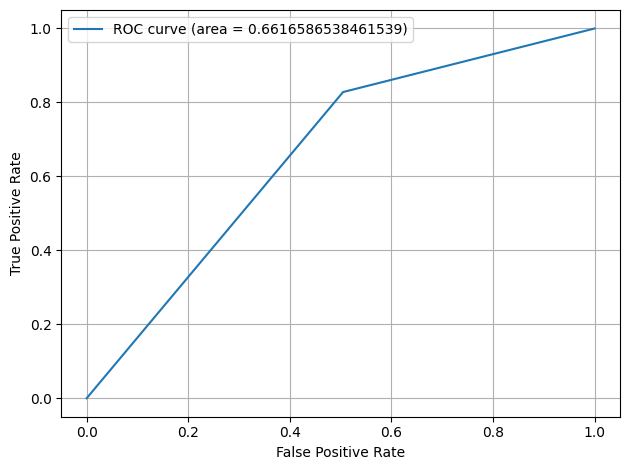

13/13 [==============================] - 4s 87ms/step
Client:client_3 | comm_round: 1 | global_acc: 77.750% | global_loss: 1.36261
Precision: 0.719 | Recall: 0.880 | F1 Score: 0.792
Confusion Matrix:
[[142  66]
 [ 23 169]]
13/13 [==============================] - 4s 88ms/step
Client:client_2 | comm_round: 1 | global_acc: 73.500% | global_loss: 1.30904
Precision: 0.694 | Recall: 0.802 | F1 Score: 0.744
Confusion Matrix:
[[140  68]
 [ 38 154]]
13/13 [==============================] - 4s 88ms/step
Client:client_4 | comm_round: 1 | global_acc: 71.500% | global_loss: 1.46597
Precision: 0.638 | Recall: 0.938 | F1 Score: 0.759
Confusion Matrix:
[[106 102]
 [ 12 180]]
13/13 [==============================] - 4s 88ms/step
Client:client_1 | comm_round: 1 | global_acc: 75.750% | global_loss: 1.35465
Precision: 0.702 | Recall: 0.859 | F1 Score: 0.773
Confusion Matrix:
[[138  70]
 [ 27 165]]
13/13 [==============================] - 2s 82ms/step
Client: GLOBAL | comm_round: 1 | global_acc: 77.000% |

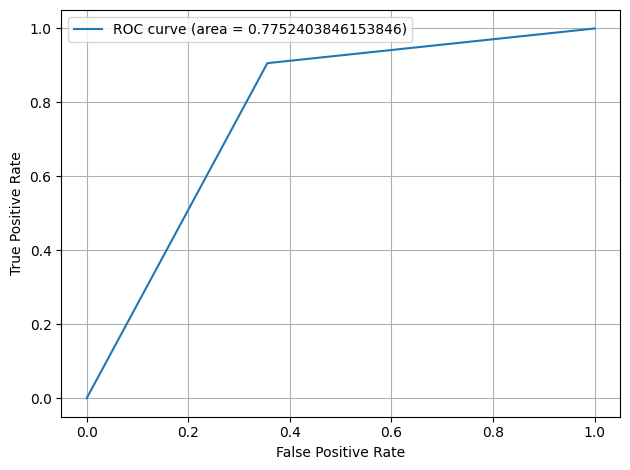

13/13 [==============================] - 4s 87ms/step
Client:client_4 | comm_round: 2 | global_acc: 80.500% | global_loss: 1.57076
Precision: 0.766 | Recall: 0.854 | F1 Score: 0.808
Confusion Matrix:
[[158  50]
 [ 28 164]]
13/13 [==============================] - 4s 88ms/step
Client:client_2 | comm_round: 2 | global_acc: 80.250% | global_loss: 1.63733
Precision: 0.756 | Recall: 0.870 | F1 Score: 0.809
Confusion Matrix:
[[154  54]
 [ 25 167]]
13/13 [==============================] - 4s 86ms/step
Client:client_1 | comm_round: 2 | global_acc: 84.250% | global_loss: 1.61441
Precision: 0.806 | Recall: 0.885 | F1 Score: 0.844
Confusion Matrix:
[[167  41]
 [ 22 170]]
13/13 [==============================] - 4s 87ms/step
Client:client_3 | comm_round: 2 | global_acc: 81.500% | global_loss: 1.58496
Precision: 0.778 | Recall: 0.859 | F1 Score: 0.817
Confusion Matrix:
[[161  47]
 [ 27 165]]
13/13 [==============================] - 2s 81ms/step
Client: GLOBAL | comm_round: 2 | global_acc: 85.250% |

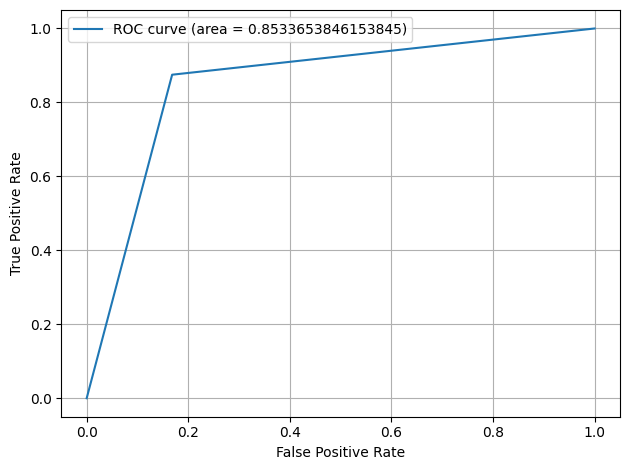

13/13 [==============================] - 4s 88ms/step
Client:client_2 | comm_round: 3 | global_acc: 78.500% | global_loss: 1.66972
Precision: 0.776 | Recall: 0.776 | F1 Score: 0.776
Confusion Matrix:
[[165  43]
 [ 43 149]]
13/13 [==============================] - 4s 86ms/step
Client:client_3 | comm_round: 3 | global_acc: 86.500% | global_loss: 1.83112
Precision: 0.842 | Recall: 0.885 | F1 Score: 0.863
Confusion Matrix:
[[176  32]
 [ 22 170]]
13/13 [==============================] - 4s 86ms/step
Client:client_1 | comm_round: 3 | global_acc: 84.000% | global_loss: 1.78729
Precision: 0.802 | Recall: 0.885 | F1 Score: 0.842
Confusion Matrix:
[[166  42]
 [ 22 170]]
13/13 [==============================] - 4s 87ms/step
Client:client_4 | comm_round: 3 | global_acc: 85.500% | global_loss: 1.80171
Precision: 0.825 | Recall: 0.885 | F1 Score: 0.854
Confusion Matrix:
[[172  36]
 [ 22 170]]
13/13 [==============================] - 2s 80ms/step
Client: GLOBAL | comm_round: 3 | global_acc: 88.500% |

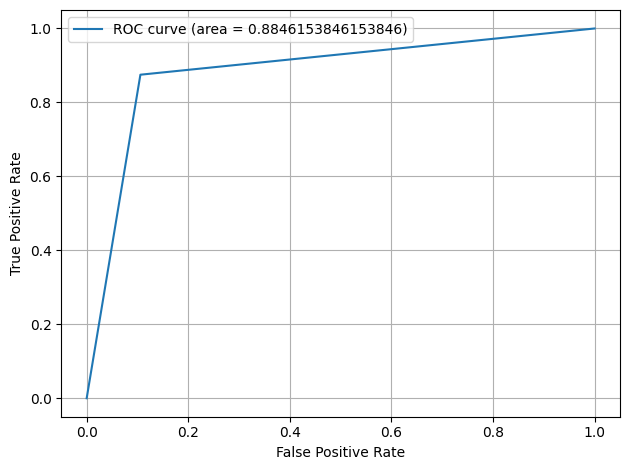

13/13 [==============================] - 4s 85ms/step
Client:client_3 | comm_round: 4 | global_acc: 87.750% | global_loss: 1.90314
Precision: 0.856 | Recall: 0.896 | F1 Score: 0.875
Confusion Matrix:
[[179  29]
 [ 20 172]]
13/13 [==============================] - 4s 85ms/step
Client:client_4 | comm_round: 4 | global_acc: 88.500% | global_loss: 1.99979
Precision: 0.865 | Recall: 0.901 | F1 Score: 0.883
Confusion Matrix:
[[181  27]
 [ 19 173]]
13/13 [==============================] - 4s 86ms/step
Client:client_2 | comm_round: 4 | global_acc: 86.000% | global_loss: 1.96857
Precision: 0.851 | Recall: 0.859 | F1 Score: 0.855
Confusion Matrix:
[[179  29]
 [ 27 165]]
13/13 [==============================] - 4s 85ms/step
Client:client_1 | comm_round: 4 | global_acc: 83.500% | global_loss: 1.80562
Precision: 0.815 | Recall: 0.849 | F1 Score: 0.832
Confusion Matrix:
[[171  37]
 [ 29 163]]
13/13 [==============================] - 2s 81ms/step
Client: GLOBAL | comm_round: 4 | global_acc: 89.000% |

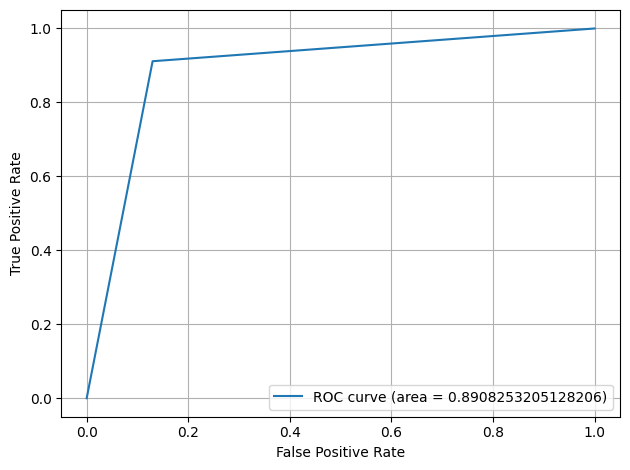

13/13 [==============================] - 4s 87ms/step
Client:client_1 | comm_round: 5 | global_acc: 86.250% | global_loss: 1.97681
Precision: 0.855 | Recall: 0.859 | F1 Score: 0.857
Confusion Matrix:
[[180  28]
 [ 27 165]]
13/13 [==============================] - 4s 84ms/step
Client:client_3 | comm_round: 5 | global_acc: 89.250% | global_loss: 2.12431
Precision: 0.871 | Recall: 0.911 | F1 Score: 0.891
Confusion Matrix:
[[182  26]
 [ 17 175]]
13/13 [==============================] - 4s 85ms/step
Client:client_4 | comm_round: 5 | global_acc: 75.250% | global_loss: 1.93245
Precision: 0.718 | Recall: 0.797 | F1 Score: 0.756
Confusion Matrix:
[[148  60]
 [ 39 153]]
13/13 [==============================] - 4s 89ms/step
Client:client_2 | comm_round: 5 | global_acc: 83.250% | global_loss: 1.93803
Precision: 0.785 | Recall: 0.896 | F1 Score: 0.837
Confusion Matrix:
[[161  47]
 [ 20 172]]
13/13 [==============================] - 2s 82ms/step
Client: GLOBAL | comm_round: 5 | global_acc: 88.250% |

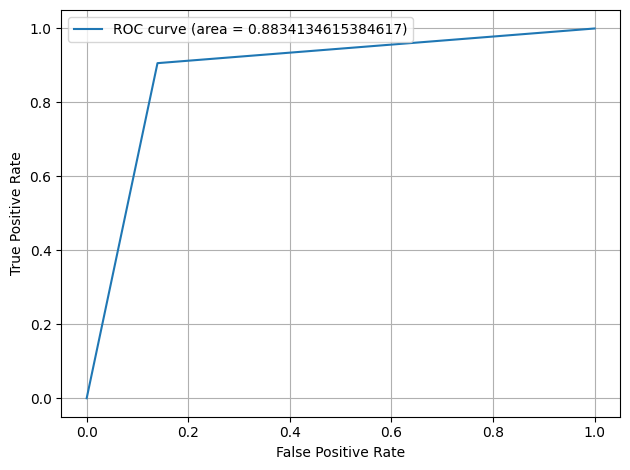

13/13 [==============================] - 4s 88ms/step
Client:client_3 | comm_round: 6 | global_acc: 89.750% | global_loss: 2.17321
Precision: 0.891 | Recall: 0.896 | F1 Score: 0.894
Confusion Matrix:
[[187  21]
 [ 20 172]]
13/13 [==============================] - 4s 85ms/step
Client:client_1 | comm_round: 6 | global_acc: 86.000% | global_loss: 2.15890
Precision: 0.830 | Recall: 0.891 | F1 Score: 0.859
Confusion Matrix:
[[173  35]
 [ 21 171]]
13/13 [==============================] - 4s 85ms/step
Client:client_2 | comm_round: 6 | global_acc: 87.250% | global_loss: 2.15178
Precision: 0.854 | Recall: 0.885 | F1 Score: 0.870
Confusion Matrix:
[[179  29]
 [ 22 170]]
13/13 [==============================] - 4s 86ms/step
Client:client_4 | comm_round: 6 | global_acc: 83.000% | global_loss: 1.97283
Precision: 0.820 | Recall: 0.828 | F1 Score: 0.824
Confusion Matrix:
[[173  35]
 [ 33 159]]
13/13 [==============================] - 2s 81ms/step
Client: GLOBAL | comm_round: 6 | global_acc: 88.000% |

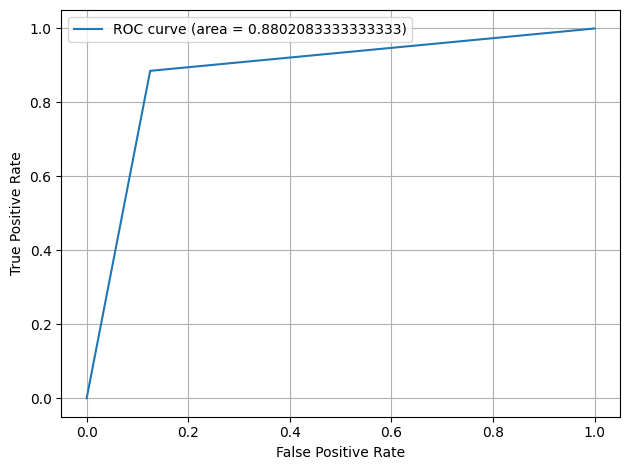

13/13 [==============================] - 4s 86ms/step
Client:client_2 | comm_round: 7 | global_acc: 89.500% | global_loss: 2.26310
Precision: 0.883 | Recall: 0.901 | F1 Score: 0.892
Confusion Matrix:
[[185  23]
 [ 19 173]]
13/13 [==============================] - 4s 87ms/step
Client:client_1 | comm_round: 7 | global_acc: 88.750% | global_loss: 2.27524
Precision: 0.873 | Recall: 0.896 | F1 Score: 0.884
Confusion Matrix:
[[183  25]
 [ 20 172]]
13/13 [==============================] - 4s 87ms/step
Client:client_3 | comm_round: 7 | global_acc: 87.000% | global_loss: 2.23823
Precision: 0.872 | Recall: 0.854 | F1 Score: 0.863
Confusion Matrix:
[[184  24]
 [ 28 164]]
13/13 [==============================] - 4s 85ms/step
Client:client_4 | comm_round: 7 | global_acc: 87.500% | global_loss: 2.23862
Precision: 0.859 | Recall: 0.885 | F1 Score: 0.872
Confusion Matrix:
[[180  28]
 [ 22 170]]
13/13 [==============================] - 3s 81ms/step
Client: GLOBAL | comm_round: 7 | global_acc: 88.750% |

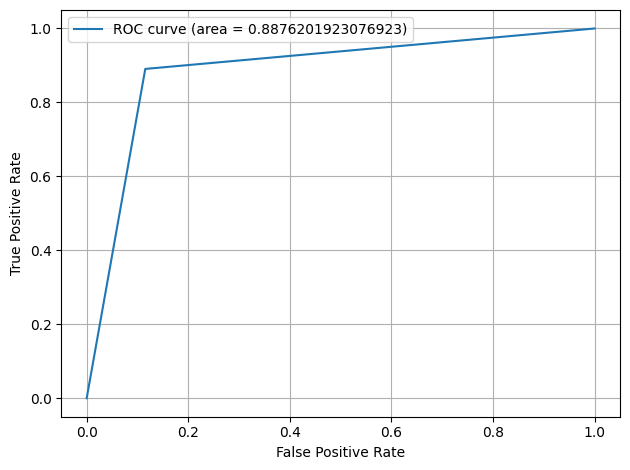

13/13 [==============================] - 4s 86ms/step
Client:client_3 | comm_round: 8 | global_acc: 87.000% | global_loss: 2.31371
Precision: 0.872 | Recall: 0.854 | F1 Score: 0.863
Confusion Matrix:
[[184  24]
 [ 28 164]]
13/13 [==============================] - 4s 87ms/step
Client:client_1 | comm_round: 8 | global_acc: 87.250% | global_loss: 2.27252
Precision: 0.831 | Recall: 0.922 | F1 Score: 0.874
Confusion Matrix:
[[172  36]
 [ 15 177]]
13/13 [==============================] - 4s 88ms/step
Client:client_4 | comm_round: 8 | global_acc: 80.250% | global_loss: 1.98406
Precision: 0.742 | Recall: 0.901 | F1 Score: 0.814
Confusion Matrix:
[[148  60]
 [ 19 173]]
13/13 [==============================] - 4s 85ms/step
Client:client_2 | comm_round: 8 | global_acc: 88.000% | global_loss: 2.35416
Precision: 0.879 | Recall: 0.870 | F1 Score: 0.874
Confusion Matrix:
[[185  23]
 [ 25 167]]
13/13 [==============================] - 2s 80ms/step
Client: GLOBAL | comm_round: 8 | global_acc: 88.500% |

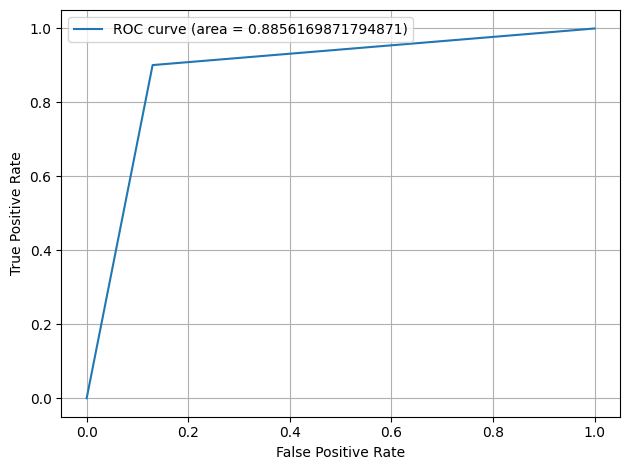

13/13 [==============================] - 4s 84ms/step
Client:client_2 | comm_round: 9 | global_acc: 87.000% | global_loss: 2.35067
Precision: 0.868 | Recall: 0.859 | F1 Score: 0.864
Confusion Matrix:
[[183  25]
 [ 27 165]]
13/13 [==============================] - 4s 88ms/step
Client:client_4 | comm_round: 9 | global_acc: 88.750% | global_loss: 2.37608
Precision: 0.869 | Recall: 0.901 | F1 Score: 0.885
Confusion Matrix:
[[182  26]
 [ 19 173]]
13/13 [==============================] - 4s 86ms/step
Client:client_1 | comm_round: 9 | global_acc: 87.250% | global_loss: 2.33212
Precision: 0.828 | Recall: 0.927 | F1 Score: 0.875
Confusion Matrix:
[[171  37]
 [ 14 178]]
13/13 [==============================] - 4s 86ms/step
Client:client_3 | comm_round: 9 | global_acc: 73.750% | global_loss: 2.18338
Precision: 0.774 | Recall: 0.641 | F1 Score: 0.701
Confusion Matrix:
[[172  36]
 [ 69 123]]
13/13 [==============================] - 3s 81ms/step
Client: GLOBAL | comm_round: 9 | global_acc: 88.750% |

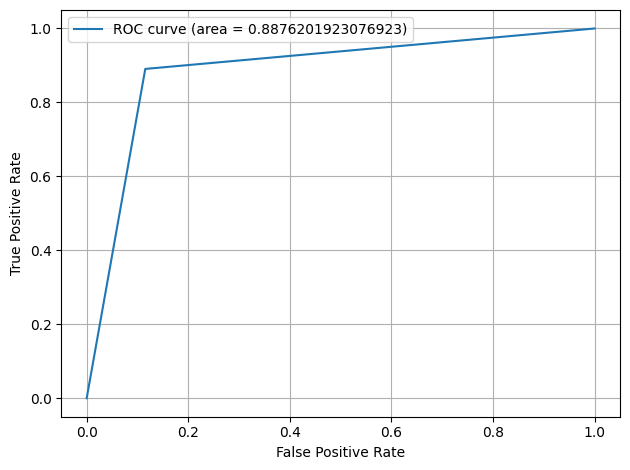

13/13 [==============================] - 4s 83ms/step
Client:client_2 | comm_round: 10 | global_acc: 87.750% | global_loss: 2.41496
Precision: 0.859 | Recall: 0.891 | F1 Score: 0.875
Confusion Matrix:
[[180  28]
 [ 21 171]]
13/13 [==============================] - 4s 86ms/step
Client:client_1 | comm_round: 10 | global_acc: 85.250% | global_loss: 2.19039
Precision: 0.859 | Recall: 0.828 | F1 Score: 0.844
Confusion Matrix:
[[182  26]
 [ 33 159]]
13/13 [==============================] - 4s 87ms/step
Client:client_4 | comm_round: 10 | global_acc: 81.500% | global_loss: 2.31483
Precision: 0.759 | Recall: 0.901 | F1 Score: 0.824
Confusion Matrix:
[[153  55]
 [ 19 173]]
13/13 [==============================] - 4s 85ms/step
Client:client_3 | comm_round: 10 | global_acc: 88.500% | global_loss: 2.42307
Precision: 0.865 | Recall: 0.901 | F1 Score: 0.883
Confusion Matrix:
[[181  27]
 [ 19 173]]
13/13 [==============================] - 2s 80ms/step
Client: GLOBAL | comm_round: 10 | global_acc: 89.7

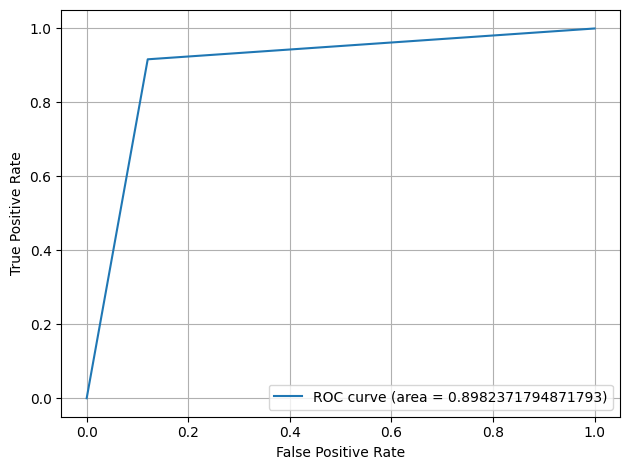

13/13 [==============================] - 4s 87ms/step
Client:client_4 | comm_round: 11 | global_acc: 89.750% | global_loss: 2.47078
Precision: 0.891 | Recall: 0.896 | F1 Score: 0.894
Confusion Matrix:
[[187  21]
 [ 20 172]]
13/13 [==============================] - 4s 88ms/step
Client:client_2 | comm_round: 11 | global_acc: 84.000% | global_loss: 2.30866
Precision: 0.905 | Recall: 0.745 | F1 Score: 0.817
Confusion Matrix:
[[193  15]
 [ 49 143]]
13/13 [==============================] - 4s 86ms/step
Client:client_1 | comm_round: 11 | global_acc: 89.500% | global_loss: 2.48662
Precision: 0.871 | Recall: 0.917 | F1 Score: 0.893
Confusion Matrix:
[[182  26]
 [ 16 176]]
13/13 [==============================] - 4s 85ms/step
Client:client_3 | comm_round: 11 | global_acc: 89.500% | global_loss: 2.47471
Precision: 0.868 | Recall: 0.922 | F1 Score: 0.894
Confusion Matrix:
[[181  27]
 [ 15 177]]
13/13 [==============================] - 2s 81ms/step
Client: GLOBAL | comm_round: 11 | global_acc: 89.5

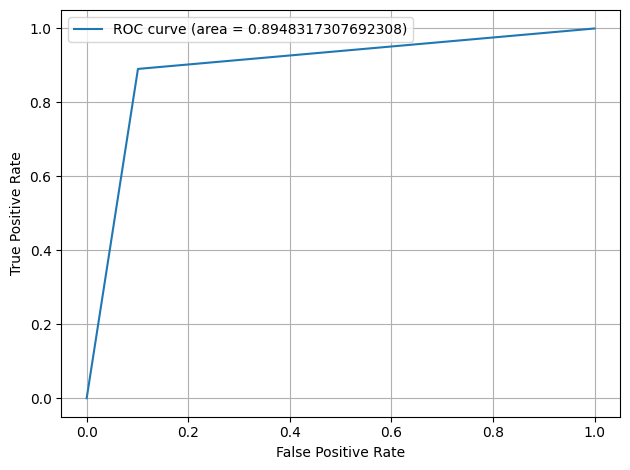

13/13 [==============================] - 4s 86ms/step
Client:client_3 | comm_round: 12 | global_acc: 90.250% | global_loss: 2.43141
Precision: 0.892 | Recall: 0.906 | F1 Score: 0.899
Confusion Matrix:
[[187  21]
 [ 18 174]]
13/13 [==============================] - 5s 86ms/step
Client:client_4 | comm_round: 12 | global_acc: 88.750% | global_loss: 2.50906
Precision: 0.866 | Recall: 0.906 | F1 Score: 0.885
Confusion Matrix:
[[181  27]
 [ 18 174]]
13/13 [==============================] - 4s 87ms/step
Client:client_1 | comm_round: 12 | global_acc: 89.000% | global_loss: 2.52285
Precision: 0.881 | Recall: 0.891 | F1 Score: 0.886
Confusion Matrix:
[[185  23]
 [ 21 171]]
13/13 [==============================] - 4s 87ms/step
Client:client_2 | comm_round: 12 | global_acc: 89.750% | global_loss: 2.50440
Precision: 0.883 | Recall: 0.906 | F1 Score: 0.895
Confusion Matrix:
[[185  23]
 [ 18 174]]
13/13 [==============================] - 2s 82ms/step
Client: GLOBAL | comm_round: 12 | global_acc: 89.5

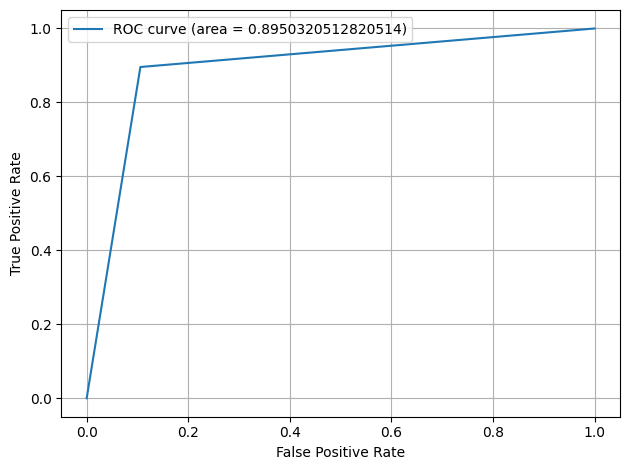

13/13 [==============================] - 4s 86ms/step
Client:client_1 | comm_round: 13 | global_acc: 89.750% | global_loss: 2.58052
Precision: 0.883 | Recall: 0.906 | F1 Score: 0.895
Confusion Matrix:
[[185  23]
 [ 18 174]]
13/13 [==============================] - 4s 87ms/step
Client:client_2 | comm_round: 13 | global_acc: 89.500% | global_loss: 2.57916
Precision: 0.887 | Recall: 0.896 | F1 Score: 0.891
Confusion Matrix:
[[186  22]
 [ 20 172]]


In [ ]:
import random
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adagrad
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet152V2
import matplotlib.pyplot as plt
import time

final_accuracy_fed_adagrad=[]
final_loss_fed_adagrad=[]
local_accuracies = {}
# Function to create client data
def create_clients(x, y, num_clients=1, initial='clients'):
    client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]
    data = list(zip(x, y))
    random.shuffle(data)
    size = len(data) // num_clients
    shards = [data[i:i + size] for i in range(0, size*num_clients, size)]
    assert(len(shards) == len(client_names))
    return {client_names[i]: shards[i] for i in range(len(client_names))} 

# Function to batch data
def batch_data(data_shard, bs=10):
    data, label = zip(*data_shard)
    dataset = tf.data.Dataset.from_tensor_slices((list(data), list(label)))
    return dataset.shuffle(len(label)).batch(bs)

# Function to calculate weight scaling factor
def weight_scalling_factor(clients_trn_data, client_name):
    client_names = list(clients_trn_data.keys())
    bs = list(clients_trn_data[client_name])[0][0].shape[0]
    global_count = sum([tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() for client_name in client_names]) * bs
    local_count = tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() * bs
    return local_count / global_count

# Function to scale model weights
def scale_model_weights(weight, scalar):
    return [scalar * w for w in weight]

# Function to sum scaled weights
def sum_scaled_weights(scaled_weight_list):
    return [tf.math.reduce_sum(tensors, axis=0) for tensors in zip(*scaled_weight_list)]

# Function to test model
def test_model(X_test, Y_test, model, comm_round):
    logits = model.predict(X_test)
    ypred = [1 if x > 0.5 else 0 for x in logits]
    loss = tf.keras.losses.binary_crossentropy(Y_test, logits)
    acc = accuracy_score(Y_test, ypred)
    precision = precision_score(Y_test, ypred, zero_division=1)
    recall = recall_score(Y_test, ypred)
    f1 = f1_score(Y_test, ypred)
    cm = confusion_matrix(Y_test, ypred)
    
    avg_loss = np.mean(loss)  # Calculate the average loss

    print('Client: GLOBAL | comm_round: {} | global_acc: {:.3%} | global_loss: {:.5f}'.format(comm_round, acc, avg_loss))
    print('Precision: {:.3f} | Recall: {:.3f} | F1 Score: {:.3f}'.format(precision, recall, f1))
    print('Confusion Matrix:')
    print(cm)
    
    return acc, avg_loss, ypred, Y_test

def test_model_local(X_test, Y_test, model, comm_round, client):
    logits = model.predict(X_test)
    ypred = [1 if x > 0.5 else 0 for x in logits]
    loss = tf.keras.losses.binary_crossentropy(Y_test, logits)
    acc = accuracy_score(Y_test, ypred)
    precision = precision_score(Y_test, ypred, zero_division=1)
    recall = recall_score(Y_test, ypred)
    f1 = f1_score(Y_test, ypred)
    cm = confusion_matrix(Y_test, ypred)
    
    avg_loss = np.mean(loss)  # Calculate the average loss

    print('Client:{} | comm_round: {} | global_acc: {:.3%} | global_loss: {:.5f}'.format(client,comm_round, acc, avg_loss))
    print('Precision: {:.3f} | Recall: {:.3f} | F1 Score: {:.3f}'.format(precision, recall, f1))
    print('Confusion Matrix:')
    print(cm)
    
    return acc, avg_loss, ypred, Y_test

# Sample data (assuming you have loaded images1 and label1)
x_train, x_test, y_train, y_test = train_test_split(images1, label1, train_size=0.8, random_state=7)

# Create client data and batch it
clients = create_clients(x_train, y_train, num_clients=4, initial='client')
clients_batched = {client_name: batch_data(data) for client_name, data in clients.items()}

# Batch the test set
test_batched = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(len(y_test))

# Define ResNet152V2 class
class ResNet152V2Model:
    @staticmethod
    def build(img_shape=img_shape):
        classifier = ResNet152V2(
                    include_top=False, input_shape=img_shape,
                    weights='imagenet'
                   )
        fine_tune_at = 100
        for layer in classifier.layers[:fine_tune_at]:
            layer.trainable = False

        model = Sequential()
        model.add(classifier)
        model.add(Flatten())
        model.add(BatchNormalization())
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.25))
        model.add(Dense(32, activation='sigmoid'))
        model.add(Dropout(0.25))
        model.add(Dense(1, activation='sigmoid'))
        return model

# Initialize global model
resnet152v2_global = ResNet152V2Model()
global_model = resnet152v2_global.build()

# Commence global training loop
comms_round = 20
times_list = []

for comm_round in range(comms_round):
    start_time = time.time()   
    global_weights = global_model.get_weights()
    scaled_local_weight_list = []

    client_names = list(clients_batched.keys())
    random.shuffle(client_names)
    
    for client in client_names:
        local_model = resnet152v2_global.build()  # Create local model for each client
        adagrad = Adagrad(learning_rate=0.01)
        local_model.compile(loss='binary_crossentropy', optimizer=adagrad, metrics=['accuracy'])
        local_model.set_weights(global_weights)  

        # Extract data and labels from the client's shard
        client_data = clients[client]
        X = np.array([data[0] for data in client_data])  # Extract data
        Y = np.array([data[1] for data in client_data])  # Extract labels

        local_model.fit(X, Y, epochs=10, batch_size=64, verbose=0)

        scaling_factor = weight_scalling_factor(clients_batched, client)
        scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
        scaled_local_weight_list.append(scaled_weights)

        # Test the model and store local accuracies
        local_acc, _, _, _ = test_model_local(x_test, y_test, local_model, comm_round, client)
        if client in local_accuracies:
            local_accuracies[client].append(local_acc)
        else:
            local_accuracies[client] = [local_acc]
        
        tf.keras.backend.clear_session()

    average_weights = sum_scaled_weights(scaled_local_weight_list)
    global_model.set_weights(average_weights)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times_list.append(elapsed_time)
    
    for X_test_batch, y_test_batch in test_batched:
        global_acc, global_loss, ypred, ytest = test_model(X_test_batch, y_test_batch, global_model, comm_round)
        final_accuracy_fed_adagrad.append(global_acc)
        final_loss_fed_adagrad.append(global_loss)
        # Plot ROC curve
        fpr, tpr, thresholds = roc_curve(ytest, ypred)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label='ROC curve (area = {})'.format(roc_auc))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.grid(True)
        plt.tight_layout()
        plt.legend()
        plt.show()

sorted_clients = sorted(local_accuracies.items(), key=lambda x: np.mean(x[1]), reverse=True)[:3]
for client, accuracies in sorted_clients:
    plt.plot(range(1, comms_round + 1), accuracies, label=client)

    plt.xlabel('Communication Round')
    plt.ylabel('Accuracy')
    plt.title('Accuracy of the Best Three Clients')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()


# FedProx

13/13 [==============================] - 4s 71ms/step
Client: client_1 | comm_round: 0 | global_acc: 67.500% | global_loss: 0.74038
Precision: 0.687 | Recall: 0.594 | F1 Score: 0.637
Confusion Matrix:
[[156  52]
 [ 78 114]]
13/13 [==============================] - 4s 81ms/step
Client: client_4 | comm_round: 0 | global_acc: 65.750% | global_loss: 0.75338
Precision: 0.652 | Recall: 0.615 | F1 Score: 0.633
Confusion Matrix:
[[145  63]
 [ 74 118]]
13/13 [==============================] - 4s 83ms/step
Client: client_2 | comm_round: 0 | global_acc: 67.000% | global_loss: 0.73821
Precision: 0.653 | Recall: 0.667 | F1 Score: 0.660
Confusion Matrix:
[[140  68]
 [ 64 128]]
13/13 [==============================] - 4s 86ms/step
Client: client_3 | comm_round: 0 | global_acc: 57.750% | global_loss: 0.75231
Precision: 0.591 | Recall: 0.391 | F1 Score: 0.470
Confusion Matrix:
[[156  52]
 [117  75]]
13/13 [==============================] - 4s 81ms/step
Client: GLOBAL | comm_round: 0 | global_acc: 55.25

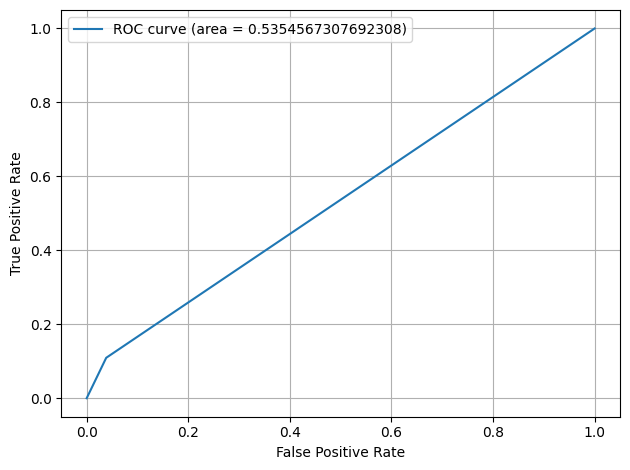

13/13 [==============================] - 4s 84ms/step
Client: client_3 | comm_round: 1 | global_acc: 62.750% | global_loss: 0.76115
Precision: 0.605 | Recall: 0.646 | F1 Score: 0.625
Confusion Matrix:
[[127  81]
 [ 68 124]]
13/13 [==============================] - 4s 84ms/step
Client: client_1 | comm_round: 1 | global_acc: 56.250% | global_loss: 0.78144
Precision: 0.524 | Recall: 0.969 | F1 Score: 0.680
Confusion Matrix:
[[ 39 169]
 [  6 186]]
13/13 [==============================] - 4s 84ms/step
Client: client_2 | comm_round: 1 | global_acc: 62.000% | global_loss: 0.75209
Precision: 0.580 | Recall: 0.755 | F1 Score: 0.656
Confusion Matrix:
[[103 105]
 [ 47 145]]
13/13 [==============================] - 4s 86ms/step
Client: client_4 | comm_round: 1 | global_acc: 63.500% | global_loss: 0.73269
Precision: 0.683 | Recall: 0.448 | F1 Score: 0.541
Confusion Matrix:
[[168  40]
 [106  86]]
13/13 [==============================] - 2s 81ms/step
Client: GLOBAL | comm_round: 1 | global_acc: 54.00

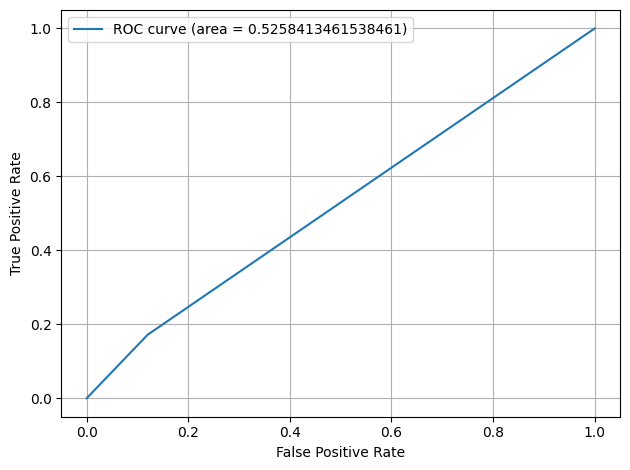

13/13 [==============================] - 4s 85ms/step
Client: client_2 | comm_round: 2 | global_acc: 66.250% | global_loss: 0.80223
Precision: 0.602 | Recall: 0.875 | F1 Score: 0.713
Confusion Matrix:
[[ 97 111]
 [ 24 168]]
13/13 [==============================] - 4s 85ms/step
Client: client_3 | comm_round: 2 | global_acc: 63.000% | global_loss: 0.75607
Precision: 0.744 | Recall: 0.349 | F1 Score: 0.475
Confusion Matrix:
[[185  23]
 [125  67]]
13/13 [==============================] - 4s 86ms/step
Client: client_4 | comm_round: 2 | global_acc: 68.000% | global_loss: 0.75729
Precision: 0.684 | Recall: 0.620 | F1 Score: 0.650
Confusion Matrix:
[[153  55]
 [ 73 119]]
13/13 [==============================] - 4s 86ms/step
Client: client_1 | comm_round: 2 | global_acc: 71.750% | global_loss: 0.73871
Precision: 0.739 | Recall: 0.635 | F1 Score: 0.683
Confusion Matrix:
[[165  43]
 [ 70 122]]
13/13 [==============================] - 2s 79ms/step
Client: GLOBAL | comm_round: 2 | global_acc: 56.00

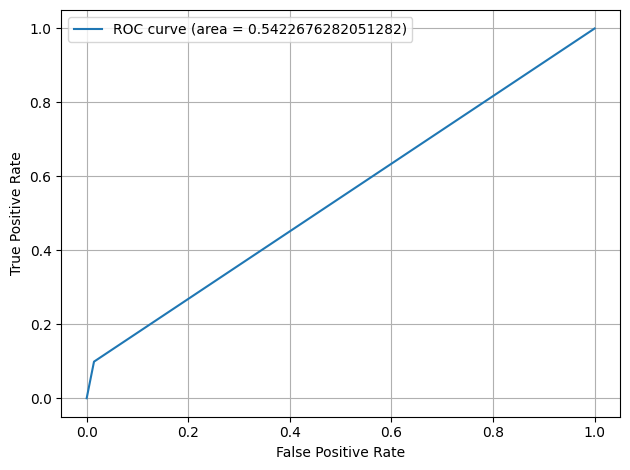

13/13 [==============================] - 4s 84ms/step
Client: client_4 | comm_round: 3 | global_acc: 66.750% | global_loss: 0.78595
Precision: 0.643 | Recall: 0.693 | F1 Score: 0.667
Confusion Matrix:
[[134  74]
 [ 59 133]]
13/13 [==============================] - 4s 85ms/step
Client: client_2 | comm_round: 3 | global_acc: 55.500% | global_loss: 0.91145
Precision: 0.520 | Recall: 0.969 | F1 Score: 0.676
Confusion Matrix:
[[ 36 172]
 [  6 186]]
13/13 [==============================] - 4s 86ms/step
Client: client_1 | comm_round: 3 | global_acc: 60.250% | global_loss: 0.80022
Precision: 0.553 | Recall: 0.891 | F1 Score: 0.683
Confusion Matrix:
[[ 70 138]
 [ 21 171]]
13/13 [==============================] - 4s 87ms/step
Client: client_3 | comm_round: 3 | global_acc: 61.250% | global_loss: 0.73242
Precision: 0.593 | Recall: 0.615 | F1 Score: 0.604
Confusion Matrix:
[[127  81]
 [ 74 118]]
13/13 [==============================] - 2s 79ms/step
Client: GLOBAL | comm_round: 3 | global_acc: 48.00

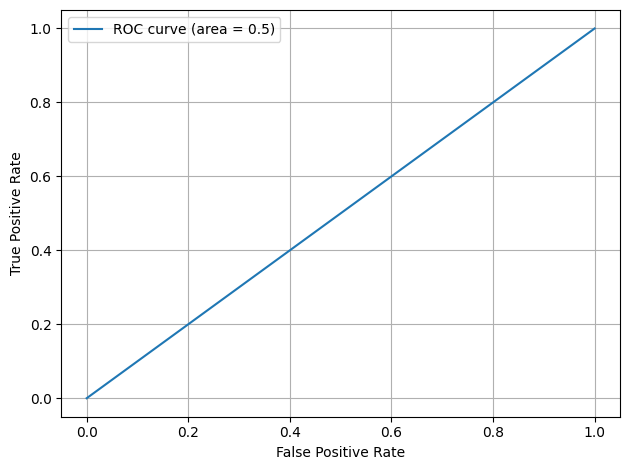

13/13 [==============================] - 4s 86ms/step
Client: client_4 | comm_round: 4 | global_acc: 63.750% | global_loss: 0.75776
Precision: 0.716 | Recall: 0.406 | F1 Score: 0.518
Confusion Matrix:
[[177  31]
 [114  78]]
13/13 [==============================] - 4s 85ms/step
Client: client_2 | comm_round: 4 | global_acc: 66.750% | global_loss: 0.76309
Precision: 0.643 | Recall: 0.693 | F1 Score: 0.667
Confusion Matrix:
[[134  74]
 [ 59 133]]
13/13 [==============================] - 4s 86ms/step
Client: client_3 | comm_round: 4 | global_acc: 61.250% | global_loss: 0.73563
Precision: 0.606 | Recall: 0.552 | F1 Score: 0.578
Confusion Matrix:
[[139  69]
 [ 86 106]]
13/13 [==============================] - 4s 85ms/step
Client: client_1 | comm_round: 4 | global_acc: 59.750% | global_loss: 0.76793
Precision: 0.554 | Recall: 0.833 | F1 Score: 0.665
Confusion Matrix:
[[ 79 129]
 [ 32 160]]
13/13 [==============================] - 2s 80ms/step
Client: GLOBAL | comm_round: 4 | global_acc: 49.00

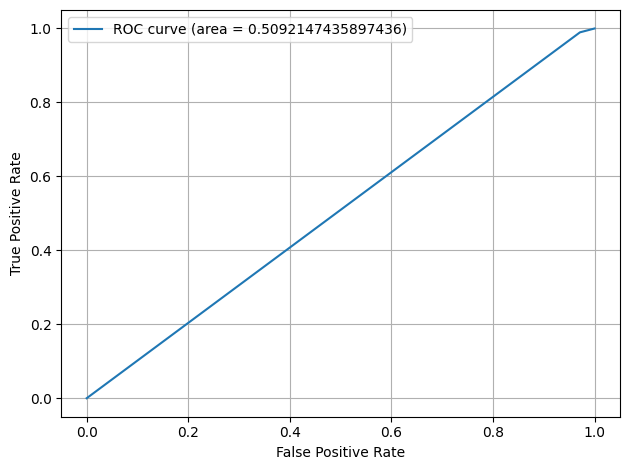

13/13 [==============================] - 4s 85ms/step
Client: client_4 | comm_round: 5 | global_acc: 64.750% | global_loss: 0.77420
Precision: 0.774 | Recall: 0.375 | F1 Score: 0.505
Confusion Matrix:
[[187  21]
 [120  72]]
13/13 [==============================] - 4s 87ms/step
Client: client_3 | comm_round: 5 | global_acc: 63.500% | global_loss: 0.74586
Precision: 0.593 | Recall: 0.760 | F1 Score: 0.667
Confusion Matrix:
[[108 100]
 [ 46 146]]
13/13 [==============================] - 4s 87ms/step
Client: client_1 | comm_round: 5 | global_acc: 56.750% | global_loss: 0.85113
Precision: 0.526 | Recall: 0.990 | F1 Score: 0.687
Confusion Matrix:
[[ 37 171]
 [  2 190]]
13/13 [==============================] - 4s 83ms/step
Client: client_2 | comm_round: 5 | global_acc: 57.750% | global_loss: 0.86645
Precision: 0.535 | Recall: 0.922 | F1 Score: 0.677
Confusion Matrix:
[[ 54 154]
 [ 15 177]]
13/13 [==============================] - 2s 78ms/step
Client: GLOBAL | comm_round: 5 | global_acc: 56.00

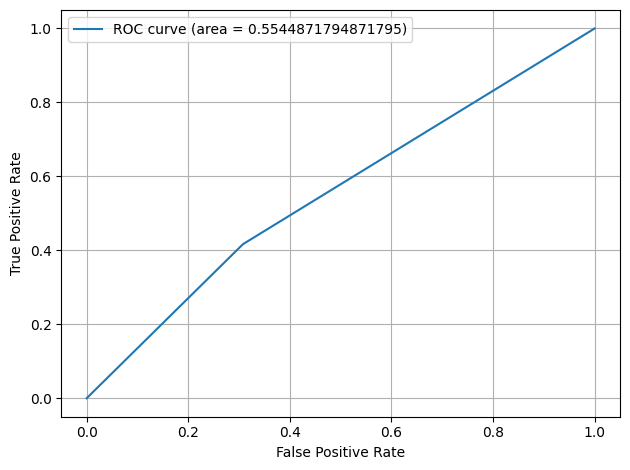

13/13 [==============================] - 4s 85ms/step
Client: client_3 | comm_round: 6 | global_acc: 61.250% | global_loss: 0.73547
Precision: 0.629 | Recall: 0.469 | F1 Score: 0.537
Confusion Matrix:
[[155  53]
 [102  90]]
13/13 [==============================] - 4s 85ms/step
Client: client_1 | comm_round: 6 | global_acc: 57.000% | global_loss: 0.78339
Precision: 0.529 | Recall: 0.938 | F1 Score: 0.677
Confusion Matrix:
[[ 48 160]
 [ 12 180]]
13/13 [==============================] - 4s 82ms/step
Client: client_4 | comm_round: 6 | global_acc: 63.750% | global_loss: 0.77912
Precision: 0.764 | Recall: 0.354 | F1 Score: 0.484
Confusion Matrix:
[[187  21]
 [124  68]]
13/13 [==============================] - 4s 87ms/step
Client: client_2 | comm_round: 6 | global_acc: 65.000% | global_loss: 0.81009
Precision: 0.602 | Recall: 0.802 | F1 Score: 0.688
Confusion Matrix:
[[106 102]
 [ 38 154]]
13/13 [==============================] - 2s 78ms/step
Client: GLOBAL | comm_round: 6 | global_acc: 54.25

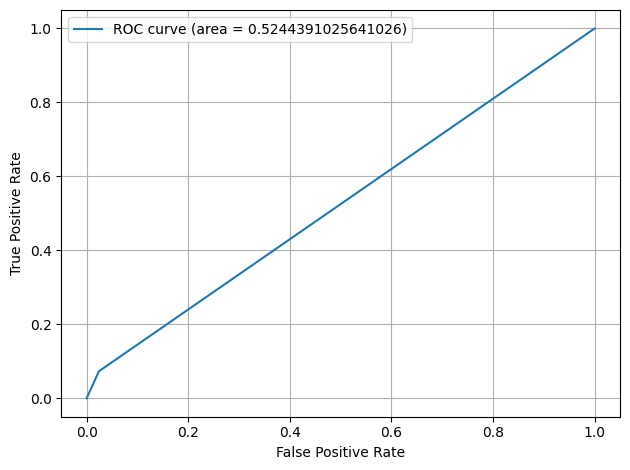

13/13 [==============================] - 4s 86ms/step
Client: client_1 | comm_round: 7 | global_acc: 66.000% | global_loss: 0.79722
Precision: 0.631 | Recall: 0.703 | F1 Score: 0.665
Confusion Matrix:
[[129  79]
 [ 57 135]]
13/13 [==============================] - 4s 86ms/step
Client: client_3 | comm_round: 7 | global_acc: 60.000% | global_loss: 0.81082
Precision: 0.686 | Recall: 0.307 | F1 Score: 0.424
Confusion Matrix:
[[181  27]
 [133  59]]
13/13 [==============================] - 4s 85ms/step
Client: client_4 | comm_round: 7 | global_acc: 65.250% | global_loss: 0.73814
Precision: 0.629 | Recall: 0.672 | F1 Score: 0.650
Confusion Matrix:
[[132  76]
 [ 63 129]]
13/13 [==============================] - 4s 85ms/step
Client: client_2 | comm_round: 7 | global_acc: 68.750% | global_loss: 0.74002
Precision: 0.687 | Recall: 0.641 | F1 Score: 0.663
Confusion Matrix:
[[152  56]
 [ 69 123]]
13/13 [==============================] - 2s 79ms/step
Client: GLOBAL | comm_round: 7 | global_acc: 55.25

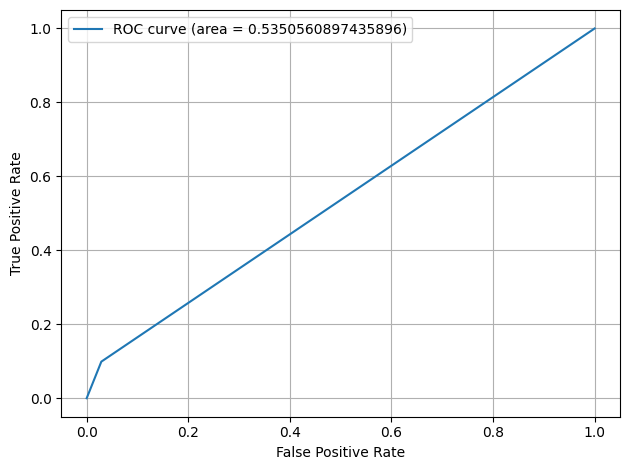

13/13 [==============================] - 4s 86ms/step
Client: client_4 | comm_round: 8 | global_acc: 65.000% | global_loss: 0.73140
Precision: 0.697 | Recall: 0.479 | F1 Score: 0.568
Confusion Matrix:
[[168  40]
 [100  92]]
13/13 [==============================] - 4s 84ms/step
Client: client_2 | comm_round: 8 | global_acc: 62.250% | global_loss: 0.77315
Precision: 0.766 | Recall: 0.307 | F1 Score: 0.439
Confusion Matrix:
[[190  18]
 [133  59]]
13/13 [==============================] - 4s 86ms/step
Client: client_3 | comm_round: 8 | global_acc: 62.000% | global_loss: 0.74605
Precision: 0.639 | Recall: 0.479 | F1 Score: 0.548
Confusion Matrix:
[[156  52]
 [100  92]]
13/13 [==============================] - 4s 86ms/step
Client: client_1 | comm_round: 8 | global_acc: 63.500% | global_loss: 0.79479
Precision: 0.588 | Recall: 0.797 | F1 Score: 0.677
Confusion Matrix:
[[101 107]
 [ 39 153]]
13/13 [==============================] - 2s 79ms/step
Client: GLOBAL | comm_round: 8 | global_acc: 55.25

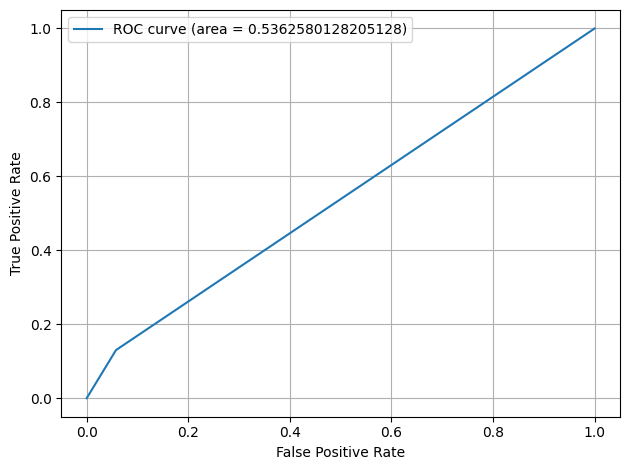

13/13 [==============================] - 4s 85ms/step
Client: client_1 | comm_round: 9 | global_acc: 62.000% | global_loss: 0.74106
Precision: 0.576 | Recall: 0.786 | F1 Score: 0.665
Confusion Matrix:
[[ 97 111]
 [ 41 151]]
13/13 [==============================] - 4s 84ms/step
Client: client_4 | comm_round: 9 | global_acc: 67.500% | global_loss: 0.75984
Precision: 0.630 | Recall: 0.781 | F1 Score: 0.698
Confusion Matrix:
[[120  88]
 [ 42 150]]
13/13 [==============================] - 4s 84ms/step
Client: client_3 | comm_round: 9 | global_acc: 61.750% | global_loss: 0.76942
Precision: 0.636 | Recall: 0.474 | F1 Score: 0.543
Confusion Matrix:
[[156  52]
 [101  91]]
13/13 [==============================] - 4s 85ms/step
Client: client_2 | comm_round: 9 | global_acc: 51.750% | global_loss: 0.80062
Precision: 0.499 | Recall: 0.974 | F1 Score: 0.660
Confusion Matrix:
[[ 20 188]
 [  5 187]]
13/13 [==============================] - 2s 82ms/step
Client: GLOBAL | comm_round: 9 | global_acc: 58.00

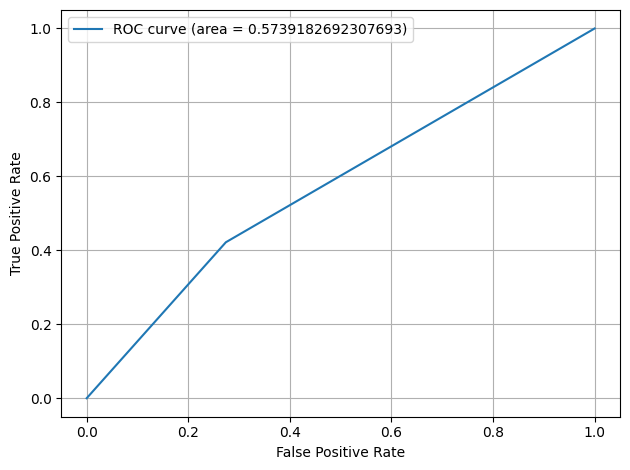

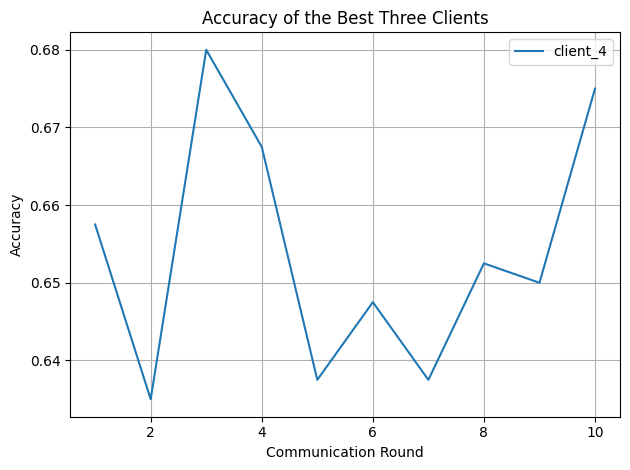

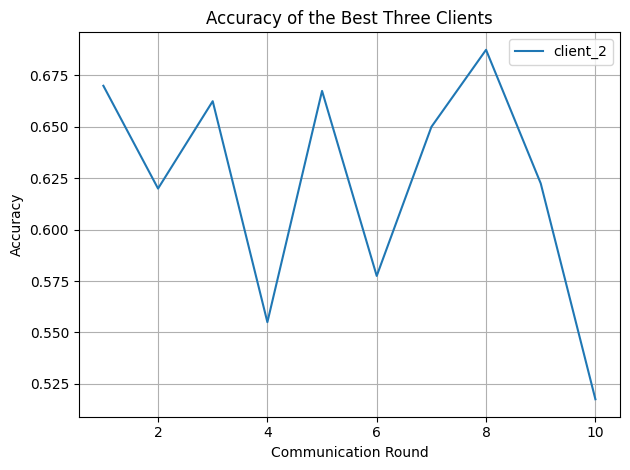

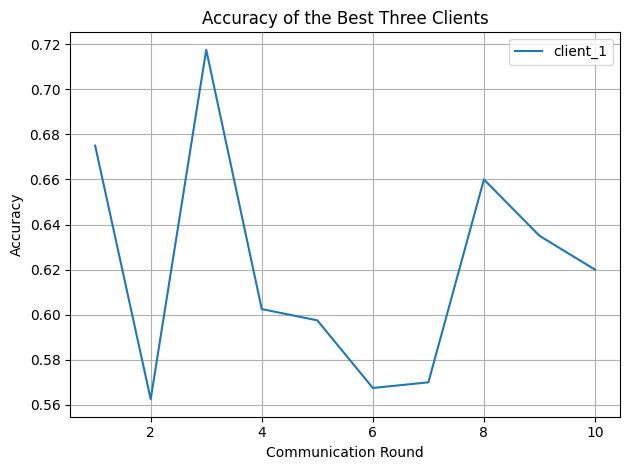

In [20]:
import random
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet152V2
import matplotlib.pyplot as plt
import time

final_accuracy_fed_prox=[]
final_loss_fed_prox=[]
local_accuracies = {}
# Function to create client data
def create_clients(x, y, num_clients=1, initial='clients'):
    client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]
    data = list(zip(x, y))
    random.shuffle(data)
    size = len(data) // num_clients
    shards = [data[i:i + size] for i in range(0, size*num_clients, size)]
    assert(len(shards) == len(client_names))
    return {client_names[i]: shards[i] for i in range(len(client_names))} 

# Function to batch data
def batch_data(data_shard, bs=10):
    data, label = zip(*data_shard)
    dataset = tf.data.Dataset.from_tensor_slices((list(data), list(label)))
    return dataset.shuffle(len(label)).batch(bs)

# Function to calculate weight scaling factor
def weight_scaling_factor(clients_trn_data, client_name):
    client_names = list(clients_trn_data.keys())
    bs = list(clients_trn_data[client_name])[0][0].shape[0]
    global_count = sum([tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() for client_name in client_names]) * bs
    local_count = tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() * bs
    return local_count / global_count

# Function to scale model weights
def scale_model_weights(weight, scalar):
    return [scalar * w for w in weight]

# Function to sum scaled weights
def sum_scaled_weights(scaled_weight_list):
    return [tf.math.reduce_sum(tensors, axis=0) for tensors in zip(*scaled_weight_list)]

# Define the FedProx loss function with a default proximal term value
def fedprox_loss(y_true, y_pred, global_weights, local_weights, proximal_term=0.1):
    # Add the proximal term to the loss calculation
    loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    proximal_loss = proximal_term * tf.nn.l2_loss(global_weights - local_weights)
    return loss + proximal_loss

# Function to train local model
def train_local_model(model, X, Y, optimizer, epochs, batch_size):
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.fit(X, Y, epochs=epochs, batch_size=batch_size, verbose=0)
    return model.get_weights()

# Function to test model
def test_model(X_test, Y_test, model, comm_round):
    logits = model.predict(X_test)
    ypred = [1 if x > 0.5 else 0 for x in logits]
    loss = tf.keras.losses.binary_crossentropy(Y_test, logits)
    acc = accuracy_score(Y_test, ypred)
    precision = precision_score(Y_test, ypred, zero_division=1)
    recall = recall_score(Y_test, ypred)
    f1 = f1_score(Y_test, ypred)
    cm = confusion_matrix(Y_test, ypred)
    
    avg_loss = np.mean(loss)  # Calculate the average loss

    print('Client: GLOBAL | comm_round: {} | global_acc: {:.3%} | global_loss: {:.5f}'.format(comm_round, acc, avg_loss))
    print('Precision: {:.3f} | Recall: {:.3f} | F1 Score: {:.3f}'.format(precision, recall, f1))
    print('Confusion Matrix:')
    print(cm)
    
    return acc, avg_loss, ypred, Y_test

def test_model_local(X_test, Y_test, model, comm_round,client):
    logits = model.predict(X_test)
    ypred = [1 if x > 0.5 else 0 for x in logits]
    loss = tf.keras.losses.binary_crossentropy(Y_test, logits)
    acc = accuracy_score(Y_test, ypred)
    precision = precision_score(Y_test, ypred, zero_division=1)
    recall = recall_score(Y_test, ypred)
    f1 = f1_score(Y_test, ypred)
    cm = confusion_matrix(Y_test, ypred)
    
    avg_loss = np.mean(loss)  # Calculate the average loss

    print('Client: {} | comm_round: {} | global_acc: {:.3%} | global_loss: {:.5f}'.format(client,comm_round, acc, avg_loss))
    print('Precision: {:.3f} | Recall: {:.3f} | F1 Score: {:.3f}'.format(precision, recall, f1))
    print('Confusion Matrix:')
    print(cm)
    
    return acc, avg_loss, ypred, Y_test


# Sample data (assuming you have loaded images1 and label1)
x_train, x_test, y_train, y_test = train_test_split(images1, label1, train_size=0.8, random_state=7)

# Create client data and batch it
clients = create_clients(x_train, y_train, num_clients=4, initial='client')
clients_batched = {client_name: batch_data(data) for client_name, data in clients.items()}

# Batch the test set
test_batched = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(len(y_test))

# Define ResNet152V2 class
class ResNet152V2Model:
    @staticmethod
    def build(img_shape=img_shape):
        classifier = ResNet152V2(
                    include_top=False, input_shape=img_shape,
                    weights='imagenet'
                   )
        fine_tune_at = 100
        for layer in classifier.layers[:fine_tune_at]:
            layer.trainable = False

        model = Sequential()
        model.add(classifier)
        model.add(Flatten())
        model.add(BatchNormalization())
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.25))
        model.add(Dense(32, activation='sigmoid'))
        model.add(Dropout(0.25))
        model.add(Dense(1, activation='sigmoid'))
        return model

# Initialize global model
resnet152v2_global = ResNet152V2Model()
global_model = resnet152v2_global.build()

# Commence global training loop
comms_round = 10
times_list = []

for comm_round in range(comms_round):
    start_time = time.time()   
    global_weights = global_model.get_weights()
    scaled_local_weight_list = []

    client_names = list(clients_batched.keys())
    random.shuffle(client_names)
    
    for client in client_names:
        local_model = resnet152v2_global.build()  # Create local model for each client
        optimizer = SGD(learning_rate=0.01)  # Use SGD optimizer for FedProx

        # Train the local model and get its weights
        client_data = clients[client]
        X = np.array([data[0] for data in client_data])  # Extract data
        Y = np.array([data[1] for data in client_data])  # Extract labels
        local_weights = train_local_model(local_model, X, Y, optimizer, epochs=10, batch_size=64)

        scaling_factor = weight_scaling_factor(clients_batched, client)
        scaled_weights = scale_model_weights(local_weights, scaling_factor)
        scaled_local_weight_list.append(scaled_weights)

        local_acc, _, _, _ = test_model_local(x_test, y_test, local_model, comm_round, client)
        if client in local_accuracies:
            local_accuracies[client].append(local_acc)
        else:
            local_accuracies[client] = [local_acc]
        
        tf.keras.backend.clear_session()

    average_weights = sum_scaled_weights(scaled_local_weight_list)
    global_model.set_weights(average_weights)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times_list.append(elapsed_time)
    
    for X_test_batch, y_test_batch in test_batched:
        global_acc, global_loss, ypred, ytest = test_model(X_test_batch, y_test_batch, global_model, comm_round)
        final_accuracy_fed_prox.append(global_acc)
        final_loss_fed_prox.append(global_loss)
        # Plot ROC curve
        fpr, tpr, thresholds = roc_curve(ytest, ypred)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label='ROC curve (area = {})'.format(roc_auc))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.grid(True)
        plt.tight_layout()
        plt.legend()
        plt.show()


sorted_clients = sorted(local_accuracies.items(), key=lambda x: np.mean(x[1]), reverse=True)[:3]
for client, accuracies in sorted_clients:
    plt.plot(range(1, comms_round + 1), accuracies, label=client)
    plt.xlabel('Communication Round')
    plt.ylabel('Accuracy')
    plt.title('Accuracy of the Best Three Clients')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

labels=['FedAvg','FedAdagrad','FedProx']
comms_rounds=range(1,len(final_accuracy_fed_avg)+1)
plt.figure(figsize=(10,6))

plt.plot(comms_rounds,final_accuracy_fed_avg,label=labels[0])
plt.plot(comms_rounds,final_accuracy_fed_adagrad,label=labels[1])
plt.plot(comms_rounds,final_accuracy_fed_prox,label=labels[2])

plt.title("Global Accuracies of Different FL Models")
plt.xlabel("Communication Rounds")
plt.ylabel("Accuracy")
plt.xticks(comms_rounds)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('Global_Accuracies_FL_Comparision.png')
plt.show()



In [ ]:
import matplotlib.pyplot as plt

labels=['FedAvg','FedAdagrad','FedProx']
comms_rounds=range(1,len(final_loss_fed_avg)+1)
plt.figure(figsize=(10,6))

plt.plot(comms_rounds,final_loss_fed_avg,label=labels[0])
plt.plot(comms_rounds,final_loss_fed_adagrad,label=labels[1])
plt.plot(comms_rounds,final_loss_fed_prox,label=labels[2])

plt.title("Global Losses of Different FL Models")
plt.xlabel("Communication Rounds")
plt.ylabel("Loss")
plt.xticks(comms_rounds)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('Global_Losses_FL_Comparision.png')
plt.show()

In [ ]:
x_train

In [ ]:
count_malignant=0
count_benign=0
for i in y_train:
    if i==1:
        count_malignant+=1
    elif i==0:
        count_benign+=1
print("Total no. of elements in y_train are : ",y_train.shape)
print("No. of Benign images in y_train are : ",count_benign)
print("No. of Malignant images in y_train are : ",count_malignant)

In [ ]:
count_malignant=0
count_benign=0
for i in y_test:
    if i==1:
        count_malignant+=1
    elif i==0:
        count_benign+=1
print("Total no. of elements in y_test are : ",y_test.shape)
print("No. of Benign images in y_test are : ",count_benign)
print("No. of Malignant images in y_test are : ",count_malignant)

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
mask_train

In [ ]:
images1 = np.nan_to_num(images1)
masks1 = np.nan_to_num(masks1 )

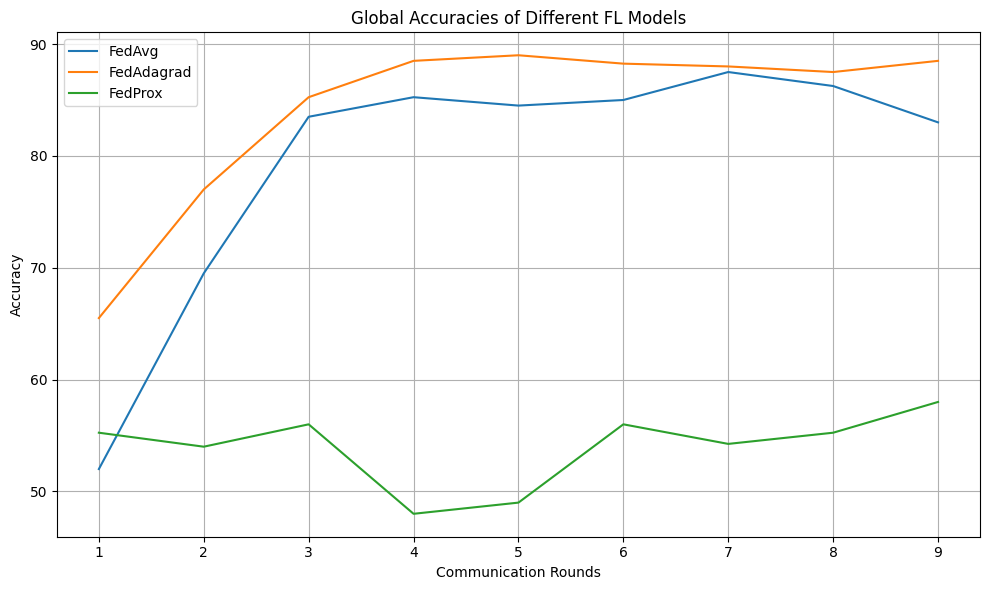

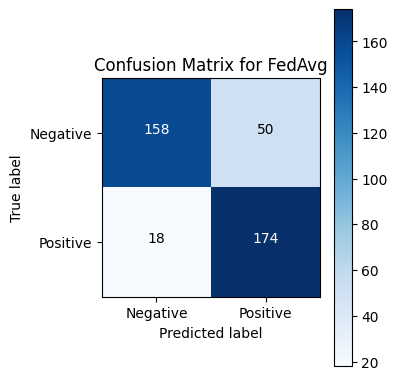

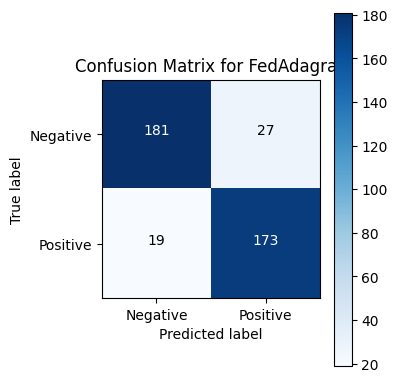

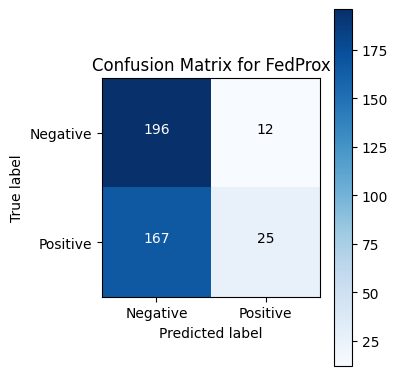

In [5]:
avg=[52,69.50,83.50,85.25,84.50,85.00,87.50,86.25,83.00]
adagrad=[65.50,77.00,85.25,88.50,89,88.25,88.00,87.50,88.50]
prox=[55.25,54.00,56.00,48.00,49.00,56.00,54.250,55.25,58]

import matplotlib.pyplot as plt
import numpy as np

# Arrays
labels=['FedAvg','FedAdagrad','FedProx']
comms_rounds=range(1, len(avg)+1)
final_accuracy_fed_avg = avg
final_accuracy_fed_adagrad = adagrad
final_accuracy_fed_prox = prox

# Plotting
plt.figure(figsize=(10,6))

plt.plot(comms_rounds, final_accuracy_fed_avg, label=labels[0])
plt.plot(comms_rounds, final_accuracy_fed_adagrad, label=labels[1])
plt.plot(comms_rounds, final_accuracy_fed_prox, label=labels[2])

plt.title("Global Accuracies of Different FL Models")
plt.xlabel("Communication Rounds")
plt.ylabel("Accuracy")
plt.xticks(comms_rounds)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('Global_Accuracies_FL_Comparision.png')
plt.show()

# Confusion Matrices
# Confusion Matrices
confusion_matrices = [
    np.array([[158, 50], [18, 174]]),   # Confusion matrix for avg
    np.array([[181, 27], [19, 173]]),    # Confusion matrix for adagrad
    np.array([[196, 12], [167, 25]])     # Confusion matrix for prox
]

# Displaying confusion matrices
for i, confusion_matrix in enumerate(confusion_matrices):
    model_name = labels[i]
    plt.figure(figsize=(4, 4))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.colorbar()
    classes = ['Negative', 'Positive'] # Assuming negative is the majority class
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = confusion_matrix.max() / 2.
    for x in range(2):
        for y in range(2):
            plt.text(y, x, format(confusion_matrix[x, y], fmt), horizontalalignment="center", color="white" if confusion_matrix[x, y] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig(f'Confusion_Matrix_{model_name}.png')
    plt.show()



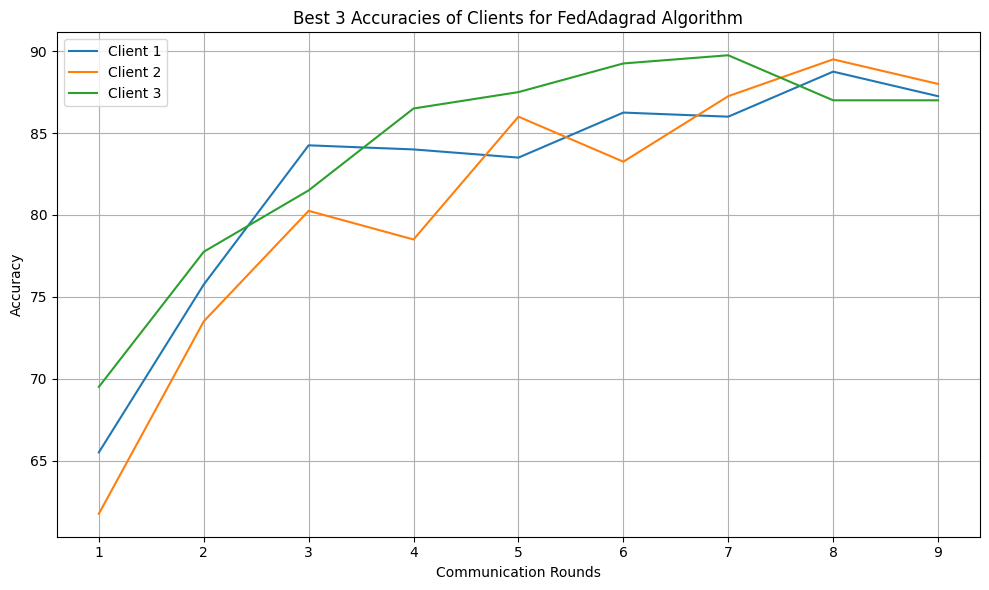

In [7]:
import matplotlib.pyplot as plt

# Data
adagrad_best3_1 = [65.50, 75.75, 84.25, 84.00, 83.50, 86.25, 86.00, 88.75, 87.25]
adagrad_best3_2 = [61.75, 73.50, 80.25, 78.50, 86.00, 83.25, 87.25, 89.50, 88.00]
adagrad_best3_3 = [69.50, 77.75, 81.50, 86.50, 87.50, 89.25, 89.75, 87.00, 87.00]

# Plotting
comms_rounds = range(1, len(adagrad_best3_1) + 1)

plt.figure(figsize=(10, 6))

plt.plot(comms_rounds, adagrad_best3_1, label='Client 1')
plt.plot(comms_rounds, adagrad_best3_2, label='Client 2')
plt.plot(comms_rounds, adagrad_best3_3, label='Client 3')

plt.title("Best 3 Accuracies of Clients for FedAdagrad Algorithm")
plt.xlabel("Communication Rounds")
plt.ylabel("Accuracy")
plt.xticks(comms_rounds)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("Best_3_accuracies_Fed_adagrad.png")
plt.show()


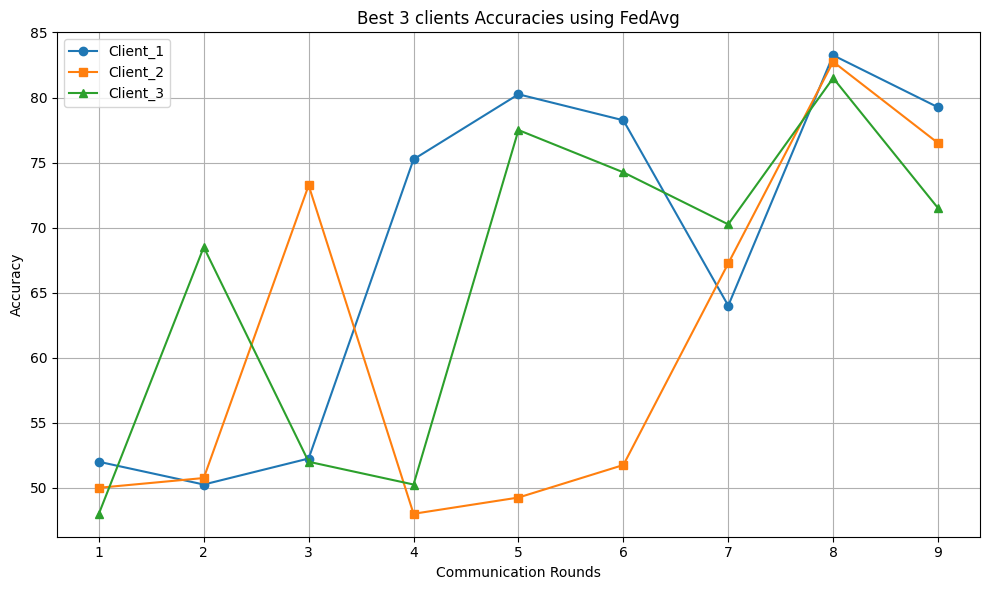

In [5]:
import matplotlib.pyplot as plt

# Data
avg_best_2=[52.000,50.250,52.250,75.250,80.250,78.250,64.000,83.250,79.250]
avg_best_3=[50.000,50.750,73.250,48.000,49.250,51.750,67.250,82.750,76.500]
avg_best_4=[48.000,68.500,52.000,50.250,77.500,74.250,70.250,81.500,71.500]
comms_rounds = range(1, len(avg_best_2) + 1)

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(comms_rounds, avg_best_2, label='Client_1', marker='o')
plt.plot(comms_rounds, avg_best_3, label='Client_2', marker='s')
plt.plot(comms_rounds, avg_best_4, label='Client_3', marker='^')

plt.title("Best 3 clients Accuracies using FedAvg")
plt.xlabel("Communication Rounds")
plt.ylabel("Accuracy")
plt.xticks(comms_rounds)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("Avg_accuracies.png")
plt.show()


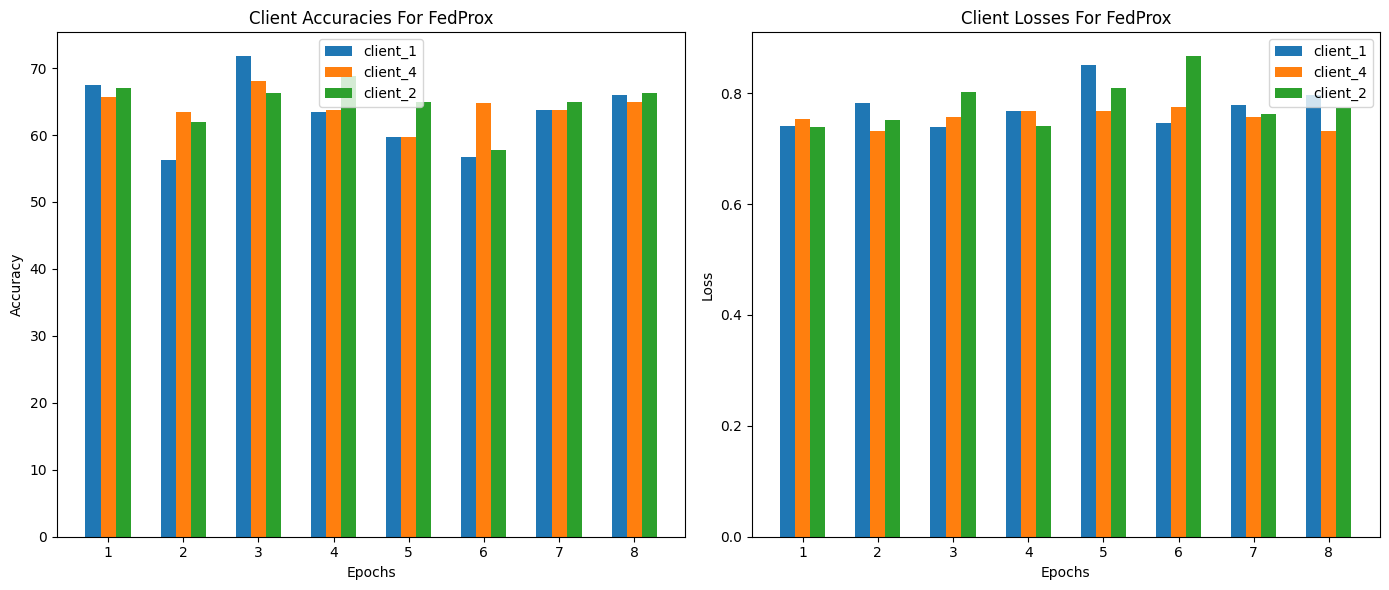

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Data for best 3 client accuracies and losses across 8 epochs
client_acc = {
    'client_1': [67.500, 56.250, 71.750, 63.500, 59.750, 56.750, 63.750, 66.000],
    'client_4': [65.750, 63.500, 68.000, 63.750, 59.750, 64.750, 63.750, 65.000],
    'client_2': [67.000, 62.000, 66.250, 68.750, 65.000, 57.750, 65.000, 66.250]
}

client_loss = {
    'client_1': [0.74038, 0.78144, 0.73871, 0.76793, 0.85113, 0.74586, 0.77912, 0.79722],
    'client_4': [0.75338, 0.73269, 0.75729, 0.76776, 0.76793, 0.77420, 0.75776, 0.73140],
    'client_2': [0.73821, 0.75209, 0.80223, 0.74002, 0.81009, 0.86645, 0.76309, 0.77315]
}

# Extracting client names and epochs
clients = list(client_acc.keys())
epochs = np.arange(1, len(client_acc['client_1']) + 1)

# Width of each bar
bar_width = 0.2

# Creating subplots for accuracies and losses
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plotting accuracies
for i, client in enumerate(clients):
    axs[0].bar(epochs + i * bar_width, client_acc[client], label=client, width=bar_width)

axs[0].set_title('Client Accuracies For FedProx')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].set_xticks(epochs + bar_width * (len(clients) - 1) / 2)
axs[0].set_xticklabels(epochs)
axs[0].legend()

# Plotting losses
for i, client in enumerate(clients):
    axs[1].bar(epochs + i * bar_width, client_loss[client], label=client, width=bar_width)

axs[1].set_title('Client Losses For FedProx')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].set_xticks(epochs + bar_width * (len(clients) - 1) / 2)
axs[1].set_xticklabels(epochs)
axs[1].legend()
plt.savefig('fedprox_acc_loss_chart.png')
plt.tight_layout()
plt.show()


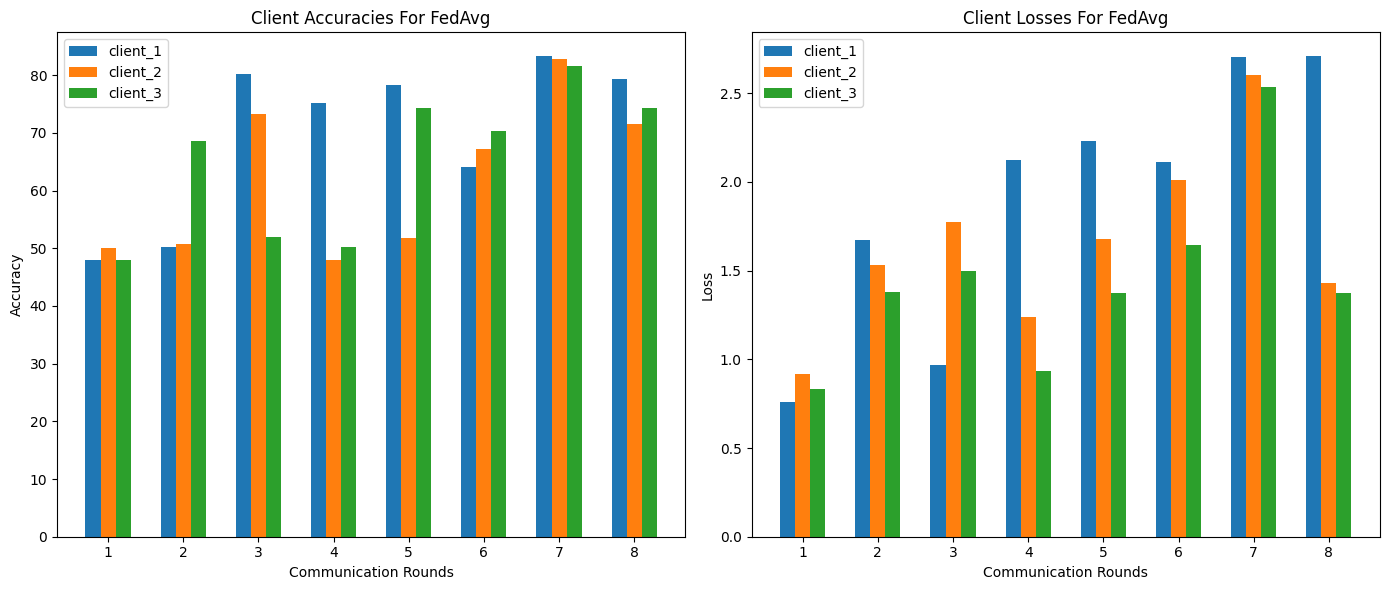

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Data for accuracies and losses across communication rounds for each client
client_data = {
    'client_1': {
        'accuracy': [48.000, 50.250, 80.250, 75.250, 78.250, 64.000, 83.250, 79.250],
        'loss': [0.76156, 1.67312, 0.97051, 2.12092, 2.23338, 2.11072, 2.70355, 2.70795]
    },
    'client_2': {
        'accuracy': [50.000, 50.750, 73.250, 48.000, 51.750, 67.250, 82.750, 71.500],
        'loss': [0.91811, 1.53030, 1.77338, 1.23923, 1.67768, 2.01251, 2.60419, 1.43290]
    },
    'client_3': {
        'accuracy': [48.000, 68.500, 52.000, 50.250, 74.250, 70.250, 81.500, 74.250],
        'loss': [0.83535, 1.38090, 1.49928, 0.93358, 1.37324, 1.64176, 2.53572, 1.37429]
    }
}

# Communication rounds
comm_rounds = np.arange(1, len(client_data['client_1']['accuracy']) + 1)

# Plotting accuracies
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

for client, data in client_data.items():
    plt.bar(comm_rounds + 0.2 * (list(client_data.keys()).index(client) - 1), data['accuracy'], width=0.2, label=client)

plt.title('Client Accuracies For FedAvg')
plt.xlabel('Communication Rounds')
plt.ylabel('Accuracy')
plt.xticks(comm_rounds)
plt.legend()

# Plotting losses
plt.subplot(1, 2, 2)

for client, data in client_data.items():
    plt.bar(comm_rounds + 0.2 * (list(client_data.keys()).index(client) - 1), data['loss'], width=0.2, label=client)

plt.title('Client Losses For FedAvg')
plt.xlabel('Communication Rounds')
plt.ylabel('Loss')
plt.xticks(comm_rounds)
plt.legend()
plt.savefig('fedAvg_acc_loss_chart.png')
plt.tight_layout()
plt.show()


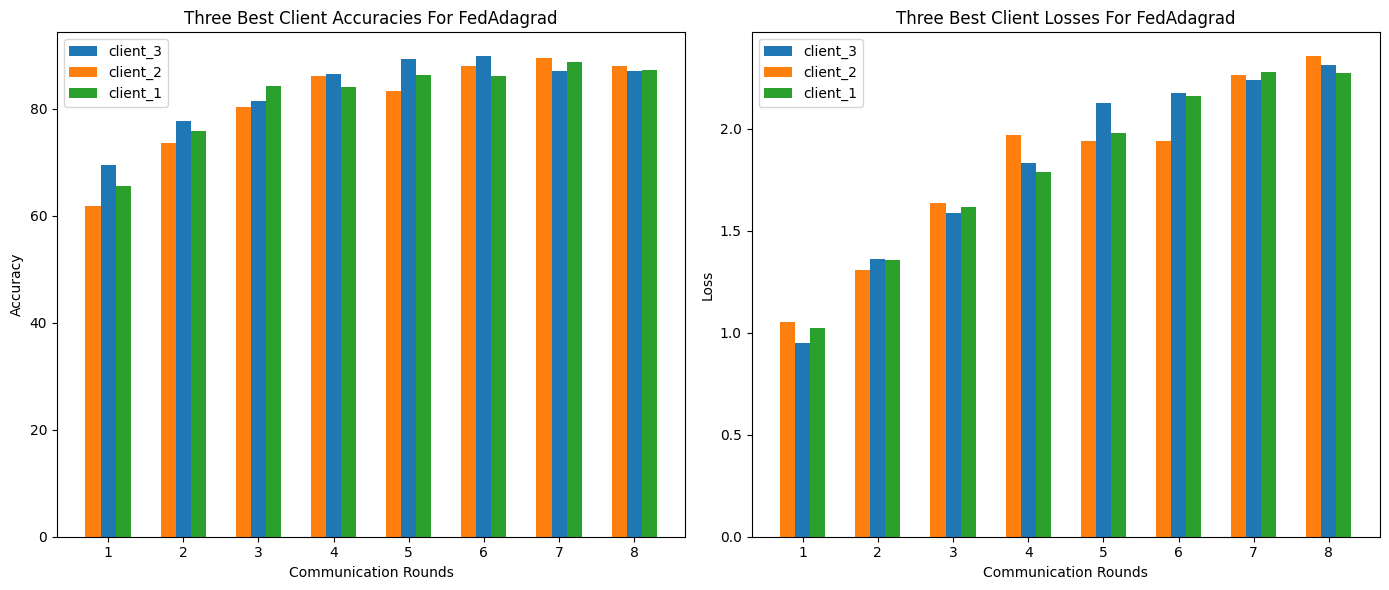

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Data for accuracies and losses across communication rounds for each client
client_data = {
    'client_2': {
        'accuracy': [61.750, 73.500, 80.250, 86.000, 83.250, 88.000, 89.500, 88.000],
        'loss': [1.05447, 1.30904, 1.63733, 1.96857, 1.93803, 1.93803, 2.26310, 2.35416]
    },
    'client_3': {
        'accuracy': [69.500, 77.750, 81.500, 86.500, 89.250, 89.750, 87.000, 87.000],
        'loss': [0.94945, 1.36261, 1.58496, 1.83112, 2.12431, 2.17321, 2.23823, 2.31371]
    },
    'client_1': {
        'accuracy': [65.500, 75.750, 84.250, 84.000, 86.250, 86.000, 88.750, 87.250],
        'loss': [1.02244, 1.35465, 1.61441, 1.78729, 1.97681, 2.15890, 2.27524, 2.27252]
    }
}

# Communication rounds
comm_rounds = np.arange(1, len(client_data['client_1']['accuracy']) + 1)

# Sort clients based on their best accuracies
sorted_clients = sorted(client_data.items(), key=lambda x: max(x[1]['accuracy']), reverse=True)[:3]

# Plotting the bar plots for the three best clients
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

for client, data in sorted_clients:
    plt.bar(comm_rounds + 0.2 * (list(client_data.keys()).index(client) - 1), data['accuracy'], width=0.2, label=client)

plt.title('Three Best Client Accuracies For FedAdagrad')
plt.xlabel('Communication Rounds')
plt.ylabel('Accuracy')
plt.xticks(comm_rounds)
plt.legend()

plt.subplot(1, 2, 2)

for client, data in sorted_clients:
    plt.bar(comm_rounds + 0.2 * (list(client_data.keys()).index(client) - 1), data['loss'], width=0.2, label=client)

plt.title('Three Best Client Losses For FedAdagrad')
plt.xlabel('Communication Rounds')
plt.ylabel('Loss')
plt.xticks(comm_rounds)
plt.legend()
plt.savefig('fedAdagrad_acc_loss_chart.png')
plt.tight_layout()
plt.show()


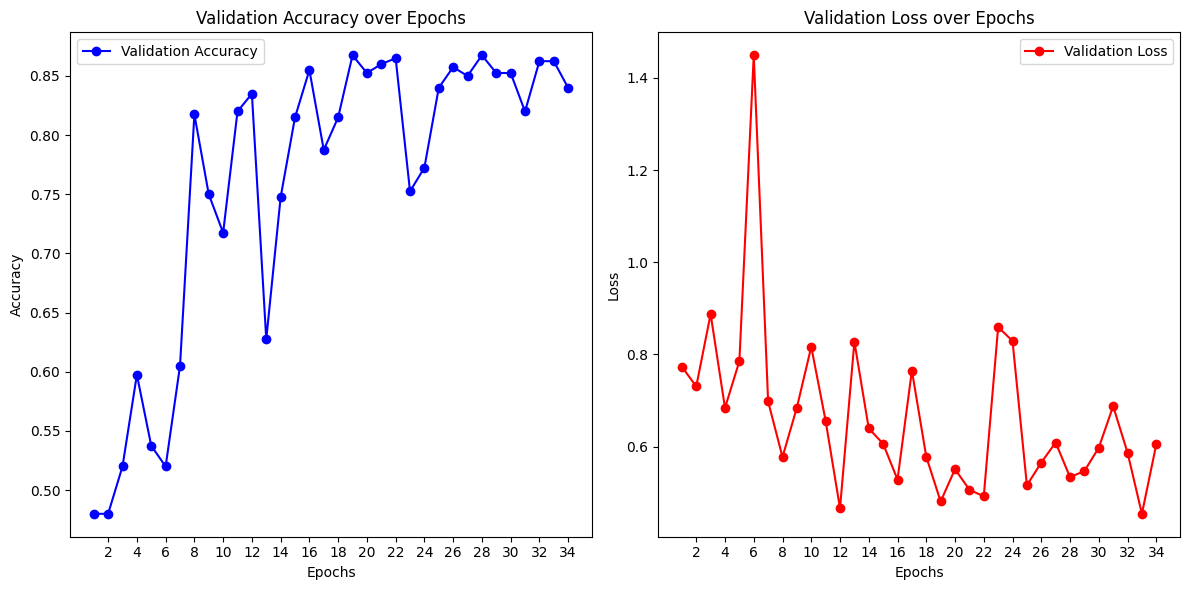

Final Confusion Matrix (Last Epoch):
[179, 157, 13, 51]


In [43]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Provided logs
logs = """
Epoch 1/50
25/25 [==============================] - 98s 649ms/step - loss: 0.6507 - acc: 0.6506 - recall: 0.6583 - precision: 0.6444 - auc: 0.6905 - true_positives: 522.0000 - true_negatives: 519.0000 - false_negatives: 271.0000 - false_positives: 288.0000 - val_loss: 0.7731 - val_acc: 0.4800 - val_recall: 1.0000 - val_precision: 0.4800 - val_auc: 0.5200 - val_true_positives: 192.0000 - val_true_negatives: 0.0000e+00 - val_false_negatives: 0.0000e+00 - val_false_positives: 208.0000
Epoch 2/50
25/25 [==============================] - 11s 438ms/step - loss: 0.5159 - acc: 0.7431 - recall: 0.7402 - precision: 0.7412 - auc: 0.8229 - true_positives: 587.0000 - true_negatives: 602.0000 - false_negatives: 206.0000 - false_positives: 205.0000 - val_loss: 0.7304 - val_acc: 0.4800 - val_recall: 1.0000 - val_precision: 0.4800 - val_auc: 0.4429 - val_true_positives: 192.0000 - val_true_negatives: 0.0000e+00 - val_false_negatives: 0.0000e+00 - val_false_positives: 208.0000
Epoch 3/50
25/25 [==============================] - 11s 459ms/step - loss: 0.3882 - acc: 0.8269 - recall: 0.8310 - precision: 0.8217 - auc: 0.9063 - true_positives: 659.0000 - true_negatives: 664.0000 - false_negatives: 134.0000 - false_positives: 143.0000 - val_loss: 0.8873 - val_acc: 0.5200 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_auc: 0.4996 - val_true_positives: 0.0000e+00 - val_true_negatives: 208.0000 - val_false_negatives: 192.0000 - val_false_positives: 0.0000e+00
Epoch 4/50
25/25 [==============================] - 12s 463ms/step - loss: 0.3107 - acc: 0.8813 - recall: 0.8840 - precision: 0.8773 - auc: 0.9393 - true_positives: 701.0000 - true_negatives: 709.0000 - false_negatives: 92.0000 - false_positives: 98.0000 - val_loss: 0.6837 - val_acc: 0.5975 - val_recall: 0.2031 - val_precision: 0.8298 - val_auc: 0.6921 - val_true_positives: 39.0000 - val_true_negatives: 200.0000 - val_false_negatives: 153.0000 - val_false_positives: 8.0000
Epoch 5/50
25/25 [==============================] - 11s 453ms/step - loss: 0.3202 - acc: 0.8775 - recall: 0.8663 - precision: 0.8842 - auc: 0.9354 - true_positives: 687.0000 - true_negatives: 717.0000 - false_negatives: 106.0000 - false_positives: 90.0000 - val_loss: 0.7853 - val_acc: 0.5375 - val_recall: 0.3229 - val_precision: 0.5299 - val_auc: 0.5724 - val_true_positives: 62.0000 - val_true_negatives: 153.0000 - val_false_negatives: 130.0000 - val_false_positives: 55.0000
Epoch 6/50
25/25 [==============================] - 11s 459ms/step - loss: 0.2139 - acc: 0.9269 - recall: 0.9193 - precision: 0.9322 - auc: 0.9696 - true_positives: 729.0000 - true_negatives: 754.0000 - false_negatives: 64.0000 - false_positives: 53.0000 - val_loss: 1.4490 - val_acc: 0.5200 - val_recall: 0.0052 - val_precision: 0.5000 - val_auc: 0.5197 - val_true_positives: 1.0000 - val_true_negatives: 207.0000 - val_false_negatives: 191.0000 - val_false_positives: 1.0000
Epoch 7/50
25/25 [==============================] - 12s 481ms/step - loss: 0.2112 - acc: 0.9219 - recall: 0.9369 - precision: 0.9083 - auc: 0.9716 - true_positives: 743.0000 - true_negatives: 732.0000 - false_negatives: 50.0000 - false_positives: 75.0000 - val_loss: 0.6977 - val_acc: 0.6050 - val_recall: 0.2656 - val_precision: 0.7500 - val_auc: 0.7722 - val_true_positives: 51.0000 - val_true_negatives: 191.0000 - val_false_negatives: 141.0000 - val_false_positives: 17.0000
Epoch 8/50
25/25 [==============================] - 12s 484ms/step - loss: 0.1329 - acc: 0.9619 - recall: 0.9634 - precision: 0.9598 - auc: 0.9831 - true_positives: 764.0000 - true_negatives: 775.0000 - false_negatives: 29.0000 - false_positives: 32.0000 - val_loss: 0.5772 - val_acc: 0.8175 - val_recall: 0.7240 - val_precision: 0.8742 - val_auc: 0.8702 - val_true_positives: 139.0000 - val_true_negatives: 188.0000 - val_false_negatives: 53.0000 - val_false_positives: 20.0000
Epoch 9/50
25/25 [==============================] - 12s 468ms/step - loss: 0.1231 - acc: 0.9619 - recall: 0.9660 - precision: 0.9575 - auc: 0.9867 - true_positives: 766.0000 - true_negatives: 773.0000 - false_negatives: 27.0000 - false_positives: 34.0000 - val_loss: 0.6846 - val_acc: 0.7500 - val_recall: 0.7344 - val_precision: 0.7421 - val_auc: 0.8130 - val_true_positives: 141.0000 - val_true_negatives: 159.0000 - val_false_negatives: 51.0000 - val_false_positives: 49.0000
Epoch 10/50
25/25 [==============================] - 12s 464ms/step - loss: 0.1747 - acc: 0.9413 - recall: 0.9458 - precision: 0.9363 - auc: 0.9775 - true_positives: 750.0000 - true_negatives: 756.0000 - false_negatives: 43.0000 - false_positives: 51.0000 - val_loss: 0.8164 - val_acc: 0.7175 - val_recall: 0.9219 - val_precision: 0.6436 - val_auc: 0.8145 - val_true_positives: 177.0000 - val_true_negatives: 110.0000 - val_false_negatives: 15.0000 - val_false_positives: 98.0000
Epoch 11/50
25/25 [==============================] - 12s 474ms/step - loss: 0.1187 - acc: 0.9625 - recall: 0.9672 - precision: 0.9576 - auc: 0.9893 - true_positives: 767.0000 - true_negatives: 773.0000 - false_negatives: 26.0000 - false_positives: 34.0000 - val_loss: 0.6557 - val_acc: 0.8200 - val_recall: 0.7708 - val_precision: 0.8409 - val_auc: 0.8681 - val_true_positives: 148.0000 - val_true_negatives: 180.0000 - val_false_negatives: 44.0000 - val_false_positives: 28.0000
Epoch 12/50
25/25 [==============================] - 12s 475ms/step - loss: 0.1039 - acc: 0.9688 - recall: 0.9634 - precision: 0.9732 - auc: 0.9906 - true_positives: 764.0000 - true_negatives: 786.0000 - false_negatives: 29.0000 - false_positives: 21.0000 - val_loss: 0.4659 - val_acc: 0.8350 - val_recall: 0.8490 - val_precision: 0.8150 - val_auc: 0.8998 - val_true_positives: 163.0000 - val_true_negatives: 171.0000 - val_false_negatives: 29.0000 - val_false_positives: 37.0000
Epoch 13/50
25/25 [==============================] - 12s 463ms/step - loss: 0.0984 - acc: 0.9712 - recall: 0.9660 - precision: 0.9758 - auc: 0.9922 - true_positives: 766.0000 - true_negatives: 788.0000 - false_negatives: 27.0000 - false_positives: 19.0000 - val_loss: 0.8274 - val_acc: 0.6275 - val_recall: 0.8646 - val_precision: 0.5744 - val_auc: 0.7699 - val_true_positives: 166.0000 - val_true_negatives: 85.0000 - val_false_negatives: 26.0000 - val_false_positives: 123.0000
Epoch 14/50
25/25 [==============================] - 12s 466ms/step - loss: 0.1223 - acc: 0.9663 - recall: 0.9546 - precision: 0.9768 - auc: 0.9865 - true_positives: 757.0000 - true_negatives: 789.0000 - false_negatives: 36.0000 - false_positives: 18.0000 - val_loss: 0.6392 - val_acc: 0.7475 - val_recall: 0.8438 - val_precision: 0.6953 - val_auc: 0.8660 - val_true_positives: 162.0000 - val_true_negatives: 137.0000 - val_false_negatives: 30.0000 - val_false_positives: 71.0000
Epoch 15/50
25/25 [==============================] - 12s 466ms/step - loss: 0.1077 - acc: 0.9669 - recall: 0.9660 - precision: 0.9672 - auc: 0.9895 - true_positives: 766.0000 - true_negatives: 781.0000 - false_negatives: 27.0000 - false_positives: 26.0000 - val_loss: 0.6059 - val_acc: 0.8150 - val_recall: 0.8854 - val_precision: 0.7658 - val_auc: 0.8602 - val_true_positives: 170.0000 - val_true_negatives: 156.0000 - val_false_negatives: 22.0000 - val_false_positives: 52.0000
Epoch 16/50
25/25 [==============================] - 12s 479ms/step - loss: 0.0958 - acc: 0.9744 - recall: 0.9710 - precision: 0.9772 - auc: 0.9892 - true_positives: 770.0000 - true_negatives: 789.0000 - false_negatives: 23.0000 - false_positives: 18.0000 - val_loss: 0.5282 - val_acc: 0.8550 - val_recall: 0.8229 - val_precision: 0.8681 - val_auc: 0.8830 - val_true_positives: 158.0000 - val_true_negatives: 184.0000 - val_false_negatives: 34.0000 - val_false_positives: 24.0000
Epoch 17/50
25/25 [==============================] - 12s 465ms/step - loss: 0.0826 - acc: 0.9756 - recall: 0.9836 - precision: 0.9677 - auc: 0.9926 - true_positives: 780.0000 - true_negatives: 781.0000 - false_negatives: 13.0000 - false_positives: 26.0000 - val_loss: 0.7648 - val_acc: 0.7875 - val_recall: 0.9167 - val_precision: 0.7184 - val_auc: 0.8417 - val_true_positives: 176.0000 - val_true_negatives: 139.0000 - val_false_negatives: 16.0000 - val_false_positives: 69.0000
Epoch 18/50
25/25 [==============================] - 12s 464ms/step - loss: 0.0690 - acc: 0.9831 - recall: 0.9836 - precision: 0.9824 - auc: 0.9930 - true_positives: 780.0000 - true_negatives: 793.0000 - false_negatives: 13.0000 - false_positives: 14.0000 - val_loss: 0.5778 - val_acc: 0.8150 - val_recall: 0.9219 - val_precision: 0.7500 - val_auc: 0.9058 - val_true_positives: 177.0000 - val_true_negatives: 149.0000 - val_false_negatives: 15.0000 - val_false_positives: 59.0000
Epoch 19/50
25/25 [==============================] - 12s 479ms/step - loss: 0.0630 - acc: 0.9862 - recall: 0.9849 - precision: 0.9874 - auc: 0.9922 - true_positives: 781.0000 - true_negatives: 797.0000 - false_negatives: 12.0000 - false_positives: 10.0000 - val_loss: 0.4807 - val_acc: 0.8675 - val_recall: 0.9062 - val_precision: 0.8325 - val_auc: 0.9091 - val_true_positives: 174.0000 - val_true_negatives: 173.0000 - val_false_negatives: 18.0000 - val_false_positives: 35.0000
Epoch 20/50
25/25 [==============================] - 12s 464ms/step - loss: 0.0793 - acc: 0.9781 - recall: 0.9723 - precision: 0.9834 - auc: 0.9927 - true_positives: 771.0000 - true_negatives: 794.0000 - false_negatives: 22.0000 - false_positives: 13.0000 - val_loss: 0.5508 - val_acc: 0.8525 - val_recall: 0.9010 - val_precision: 0.8122 - val_auc: 0.8780 - val_true_positives: 173.0000 - val_true_negatives: 168.0000 - val_false_negatives: 19.0000 - val_false_positives: 40.0000
Epoch 21/50
25/25 [==============================] - 12s 465ms/step - loss: 0.0713 - acc: 0.9800 - recall: 0.9811 - precision: 0.9786 - auc: 0.9940 - true_positives: 778.0000 - true_negatives: 790.0000 - false_negatives: 15.0000 - false_positives: 17.0000 - val_loss: 0.5063 - val_acc: 0.8600 - val_recall: 0.9479 - val_precision: 0.7982 - val_auc: 0.9090 - val_true_positives: 182.0000 - val_true_negatives: 162.0000 - val_false_negatives: 10.0000 - val_false_positives: 46.0000
Epoch 22/50
25/25 [==============================] - 12s 464ms/step - loss: 0.0508 - acc: 0.9869 - recall: 0.9887 - precision: 0.9849 - auc: 0.9965 - true_positives: 784.0000 - true_negatives: 795.0000 - false_negatives: 9.0000 - false_positives: 12.0000 - val_loss: 0.4918 - val_acc: 0.8650 - val_recall: 0.8854 - val_precision: 0.8416 - val_auc: 0.9128 - val_true_positives: 170.0000 - val_true_negatives: 176.0000 - val_false_negatives: 22.0000 - val_false_positives: 32.0000
Epoch 23/50
25/25 [==============================] - 12s 465ms/step - loss: 0.0635 - acc: 0.9806 - recall: 0.9836 - precision: 0.9774 - auc: 0.9958 - true_positives: 780.0000 - true_negatives: 789.0000 - false_negatives: 13.0000 - false_positives: 18.0000 - val_loss: 0.8592 - val_acc: 0.7525 - val_recall: 0.9479 - val_precision: 0.6716 - val_auc: 0.8397 - val_true_positives: 182.0000 - val_true_negatives: 119.0000 - val_false_negatives: 10.0000 - val_false_positives: 89.0000
Epoch 24/50
25/25 [==============================] - 12s 467ms/step - loss: 0.0954 - acc: 0.9688 - recall: 0.9647 - precision: 0.9720 - auc: 0.9914 - true_positives: 765.0000 - true_negatives: 785.0000 - false_negatives: 28.0000 - false_positives: 22.0000 - val_loss: 0.8291 - val_acc: 0.7725 - val_recall: 0.9427 - val_precision: 0.6935 - val_auc: 0.8319 - val_true_positives: 181.0000 - val_true_negatives: 128.0000 - val_false_negatives: 11.0000 - val_false_positives: 80.0000
Epoch 25/50
25/25 [==============================] - 12s 465ms/step - loss: 0.0822 - acc: 0.9750 - recall: 0.9786 - precision: 0.9712 - auc: 0.9932 - true_positives: 776.0000 - true_negatives: 784.0000 - false_negatives: 17.0000 - false_positives: 23.0000 - val_loss: 0.5158 - val_acc: 0.8400 - val_recall: 0.8906 - val_precision: 0.7991 - val_auc: 0.8993 - val_true_positives: 171.0000 - val_true_negatives: 165.0000 - val_false_negatives: 21.0000 - val_false_positives: 43.0000
Epoch 26/50
25/25 [==============================] - 12s 465ms/step - loss: 0.0448 - acc: 0.9894 - recall: 0.9912 - precision: 0.9874 - auc: 0.9971 - true_positives: 786.0000 - true_negatives: 797.0000 - false_negatives: 7.0000 - false_positives: 10.0000 - val_loss: 0.5652 - val_acc: 0.8575 - val_recall: 0.8021 - val_precision: 0.8902 - val_auc: 0.8984 - val_true_positives: 154.0000 - val_true_negatives: 189.0000 - val_false_negatives: 38.0000 - val_false_positives: 19.0000
Epoch 27/50
25/25 [==============================] - 12s 466ms/step - loss: 0.0210 - acc: 0.9975 - recall: 0.9975 - precision: 0.9975 - auc: 0.9991 - true_positives: 791.0000 - true_negatives: 805.0000 - false_negatives: 2.0000 - false_positives: 2.0000 - val_loss: 0.6087 - val_acc: 0.8500 - val_recall: 0.7604 - val_precision: 0.9125 - val_auc: 0.8974 - val_true_positives: 146.0000 - val_true_negatives: 194.0000 - val_false_negatives: 46.0000 - val_false_positives: 14.0000
Epoch 28/50
25/25 [==============================] - 12s 466ms/step - loss: 0.0269 - acc: 0.9956 - recall: 0.9950 - precision: 0.9962 - auc: 0.9975 - true_positives: 789.0000 - true_negatives: 804.0000 - false_negatives: 4.0000 - false_positives: 3.0000 - val_loss: 0.5335 - val_acc: 0.8675 - val_recall: 0.8385 - val_precision: 0.8798 - val_auc: 0.9044 - val_true_positives: 161.0000 - val_true_negatives: 186.0000 - val_false_negatives: 31.0000 - val_false_positives: 22.0000
Epoch 29/50
25/25 [==============================] - 12s 466ms/step - loss: 0.0313 - acc: 0.9944 - recall: 0.9950 - precision: 0.9937 - auc: 0.9970 - true_positives: 789.0000 - true_negatives: 802.0000 - false_negatives: 4.0000 - false_positives: 5.0000 - val_loss: 0.5468 - val_acc: 0.8525 - val_recall: 0.8438 - val_precision: 0.8482 - val_auc: 0.9078 - val_true_positives: 162.0000 - val_true_negatives: 179.0000 - val_false_negatives: 30.0000 - val_false_positives: 29.0000
Epoch 30/50
25/25 [==============================] - 12s 465ms/step - loss: 0.0218 - acc: 0.9962 - recall: 0.9962 - precision: 0.9962 - auc: 0.9992 - true_positives: 790.0000 - true_negatives: 804.0000 - false_negatives: 3.0000 - false_positives: 3.0000 - val_loss: 0.5974 - val_acc: 0.8525 - val_recall: 0.8750 - val_precision: 0.8276 - val_auc: 0.9014 - val_true_positives: 168.0000 - val_true_negatives: 173.0000 - val_false_negatives: 24.0000 - val_false_positives: 35.0000
Epoch 31/50
25/25 [==============================] - 12s 464ms/step - loss: 0.0536 - acc: 0.9862 - recall: 0.9823 - precision: 0.9898 - auc: 0.9948 - true_positives: 779.0000 - true_negatives: 799.0000 - false_negatives: 14.0000 - false_positives: 8.0000 - val_loss: 0.6875 - val_acc: 0.8200 - val_recall: 0.8281 - val_precision: 0.8030 - val_auc: 0.8677 - val_true_positives: 159.0000 - val_true_negatives: 169.0000 - val_false_negatives: 33.0000 - val_false_positives: 39.0000
Epoch 32/50
25/25 [==============================] - 12s 466ms/step - loss: 0.0998 - acc: 0.9700 - recall: 0.9697 - precision: 0.9697 - auc: 0.9910 - true_positives: 769.0000 - true_negatives: 783.0000 - false_negatives: 24.0000 - false_positives: 24.0000 - val_loss: 0.5867 - val_acc: 0.8625 - val_recall: 0.8594 - val_precision: 0.8549 - val_auc: 0.8891 - val_true_positives: 165.0000 - val_true_negatives: 180.0000 - val_false_negatives: 27.0000 - val_false_positives: 28.0000
Epoch 33/50
25/25 [==============================] - 12s 464ms/step - loss: 0.0723 - acc: 0.9762 - recall: 0.9735 - precision: 0.9785 - auc: 0.9953 - true_positives: 772.0000 - true_negatives: 790.0000 - false_negatives: 21.0000 - false_positives: 17.0000 - val_loss: 0.4540 - val_acc: 0.8625 - val_recall: 0.8906 - val_precision: 0.8341 - val_auc: 0.9230 - val_true_positives: 171.0000 - val_true_negatives: 174.0000 - val_false_negatives: 21.0000 - val_false_positives: 34.0000
Epoch 34/50
25/25 [==============================] - 12s 485ms/step - loss: 0.0606 - acc: 0.9837 - recall: 0.9748 - precision: 0.9923 - auc: 0.9937 - true_positives: 773.0000 - true_negatives: 801.0000 - false_negatives: 20.0000 - false_positives: 6.0000 - val_loss: 0.6045 - val_acc: 0.8400 - val_recall: 0.9323 - val_precision: 0.7783 - val_auc: 0.9041 - val_true_positives: 179.0000 - val_true_negatives: 157.0000 - val_false_negatives: 13.0000 - val_false_positives: 51.0000
"""
# Extract relevant information
epochs = re.findall(r'Epoch (\d+)/\d+', logs)
val_accs = re.findall(r'val_acc: ([\d.]+)', logs)
val_losses = re.findall(r'val_loss: ([\d.]+)', logs)
confusion_matrices = re.findall(r'val_true_positives: (\d+).+?val_true_negatives: (\d+).+?val_false_negatives: (\d+).+?val_false_positives: (\d+)', logs)

# Parse confusion matrices
confusion_matrices = [[int(tp), int(tn), int(fn), int(fp)] for tp, tn, fn, fp in confusion_matrices]

# Convert accuracy and loss to numpy arrays
val_accs = np.array(val_accs, dtype=float)
val_losses = np.array(val_losses, dtype=float)

# Plotting
# Plotting
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, val_accs, marker='o', color='b', label='Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, len(epochs)+1, 2))  # Set xticks at intervals of 2
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, val_losses, marker='o', color='r', label='Validation Loss')
plt.title('Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(1, len(epochs)+1, 2))  # Set xticks at intervals of 2
plt.legend()

plt.tight_layout()
plt.savefig('resnet_model_acc_loss.png')

plt.show()

# Print the final confusion matrix of the last epoch
print("Final Confusion Matrix (Last Epoch):")
print(confusion_matrices[-1])


In [40]:
val_accs

array([0.48  , 0.48  , 0.52  , 0.5975, 0.5375, 0.52  , 0.605 , 0.8175,
       0.75  , 0.7175, 0.82  , 0.835 , 0.6275, 0.7475, 0.815 , 0.855 ,
       0.7875, 0.815 , 0.8675, 0.8525, 0.86  , 0.865 , 0.7525, 0.7725,
       0.84  , 0.8575, 0.85  , 0.8675, 0.8525, 0.8525, 0.82  , 0.8625,
       0.8625, 0.84  ])

In [41]:
val_losses

array([0.7731, 0.7304, 0.8873, 0.6837, 0.7853, 1.449 , 0.6977, 0.5772,
       0.6846, 0.8164, 0.6557, 0.4659, 0.8274, 0.6392, 0.6059, 0.5282,
       0.7648, 0.5778, 0.4807, 0.5508, 0.5063, 0.4918, 0.8592, 0.8291,
       0.5158, 0.5652, 0.6087, 0.5335, 0.5468, 0.5974, 0.6875, 0.5867,
       0.454 , 0.6045])

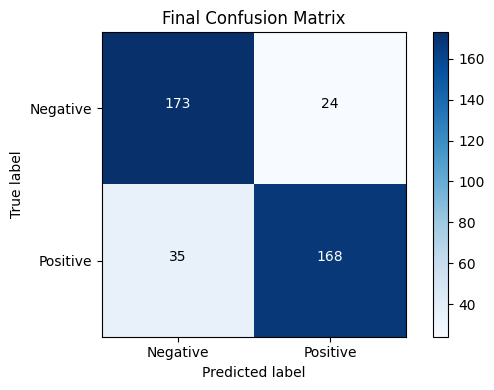

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Final Confusion Matrix Data
confusion_matrix_data = np.array([[173,24], [35,168]])

# Plotting Confusion Matrix
plt.figure(figsize=(6, 4))
plt.imshow(confusion_matrix_data, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Final Confusion Matrix')
plt.colorbar()
classes = ['Negative', 'Positive']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = confusion_matrix_data.max() / 2.
for x in range(2):
    for y in range(2):
        plt.text(y, x, format(confusion_matrix_data[x, y], fmt), horizontalalignment="center", color="white" if confusion_matrix_data[x, y] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('confusion_matrix_resnet_model.png')
plt.tight_layout()
plt.show()


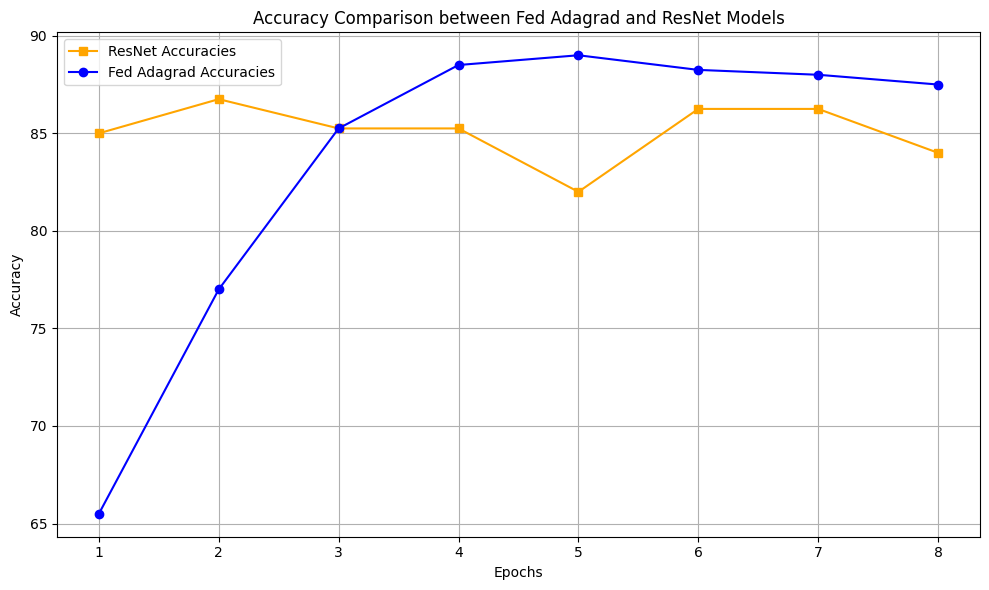

In [44]:
import matplotlib.pyplot as plt

# Data
fed_adagrad_acc = [0.85139, 1.30298, 1.60469, 1.82730, 1.99387, 2.07462, 2.16826, 2.27052, 2.32371]
resnet_acc = [0.85  , 0.8675, 0.8525, 0.8525, 0.82  , 0.8625,
       0.8625, 0.84]
for i in range(len(resnet_acc)):
    resnet_acc[i]=resnet_acc[i]*100
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(len(resnet_acc)), resnet_acc, marker='s', label='ResNet Accuracies', color='orange')

plt.plot(range(len(fed_adagrad_acc)), fed_adagrad_acc, marker='o', label='Fed Adagrad Accuracies', color='blue')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between Fed Adagrad and ResNet Models')
plt.xticks(range(len(fed_adagrad_acc)), range(1, len(fed_adagrad_acc)+1))
plt.grid(True)

# Adding legend
plt.legend()
plt.savefig('acc_comparision_fl_resnet.png')
# Displaying the plot
plt.tight_layout()
plt.show()


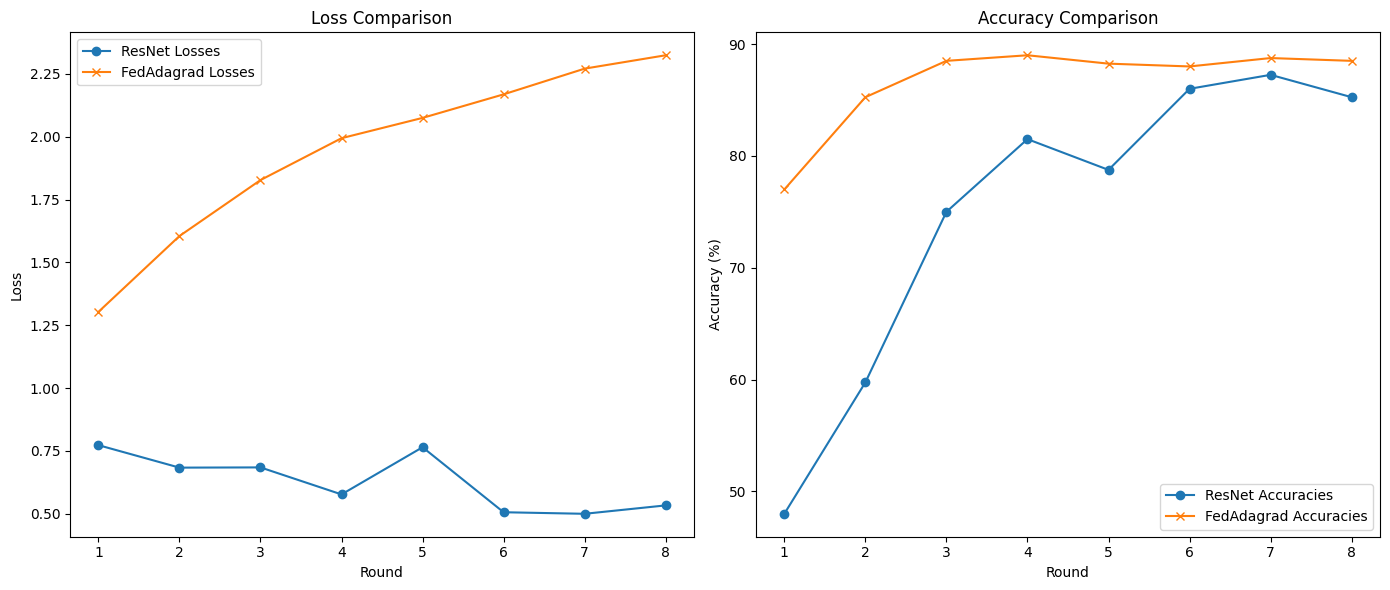

In [53]:
import matplotlib.pyplot as plt

# Data for ResNet model
resnet_losses =[0.7731, 0.6837, 0.6846, 0.5772, 0.7648, 0.5063, 0.5001, 0.5335]
resnet_accuracies = [48.00, 59.75, 75.00, 81.50,78.75, 86.00, 87.25, 85.25]
# Data for FedAdagrad global losses and accuracies
fedadagrad_losses = [1.30298, 1.60469, 1.82730, 1.99387, 2.07462, 2.16826, 2.27052, 2.32371]
fedadagrad_accuracies = [77.000, 85.250, 88.500, 89.000, 88.250, 88.000, 88.750, 88.500]
# Plotting
plt.figure(figsize=(14, 6))

# Plot for losses
plt.subplot(1, 2, 1)
plt.plot(range(1, 9), resnet_losses, marker='o', label='ResNet Losses')
plt.plot(range(1, 9), fedadagrad_losses, marker='x', label='FedAdagrad Losses')
plt.xlabel('Round')
plt.ylabel('Loss')
plt.title('Loss Comparison')
plt.legend()

# Plot for accuracies
plt.subplot(1, 2, 2)
plt.plot(range(1, 9), resnet_accuracies, marker='o', label='ResNet Accuracies')
plt.plot(range(1, 9), fedadagrad_accuracies, marker='x', label='FedAdagrad Accuracies')
plt.xlabel('Round')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison')
plt.legend()
plt.savefig('acc_loss_fl_nonfl_model_comparision.png')
plt.tight_layout()
plt.show()


# MODELS START FROM HERE

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers, regularizers

# import tensorflow as tf

# def block(inp, filters):
#     L1 = tf.keras.layers.Conv2D(filters, 1, activation='relu', padding='same', kernel_initializer='he_normal')(inp)
#     L2 = tf.keras.layers.BatchNormalization()(L1)
#     L3 = tf.keras.layers.Dropout(0.25)(L2)
    
#     M1 = tf.keras.layers.Conv2D(filters, 1, activation='relu', padding='same', kernel_initializer='he_normal')(inp)
#     M2 = tf.keras.layers.Conv2D(filters * 2, 3, activation='relu', padding="same")(M1)
#     M3 = tf.keras.layers.Conv2D(filters, 3, activation='relu', padding='same')(M2)
#     M4 = tf.keras.layers.BatchNormalization(axis=1)(M3)
#     M5 = tf.keras.layers.Dropout(0.25)(M4)
    
#     N1 = tf.keras.layers.Conv2D(filters, 1, activation='relu', padding="same", kernel_initializer='he_normal')(inp)
#     N2 = tf.keras.layers.Conv2D(filters, 3, activation='relu', padding="same")(inp)
#     N3 = tf.keras.layers.BatchNormalization(axis=1)(N2)
    
#     concat = tf.keras.layers.Concatenate()([L3, M5, N3, inp])
#     O1 = tf.keras.layers.Conv2D(filters * 2, 1, activation='relu', padding='same', kernel_initializer='he_normal')(concat)
#     output = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(O1)
#     return output


# REGULIZED CNN

In [ ]:

# Name = "CNNRegulized"
# inputs = tf.keras.Input(shape=img_shape, name=Name)
# A1 = layers.Conv2D(32, 3, activation="relu")(inputs)
# A2 = layers.MaxPooling2D(pool_size=(2, 2))(A1)
# A3 = layers.BatchNormalization()(A2)
# A4 = layers.Dropout(0.25)(A3)

# B1 = block(A4, 32)
# B2 = block(B1, 64)
# B3 = block(B2, 128)

# C1 = layers.Flatten()(B3)
# C2 = layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.02))(C1)
# C3 = layers.Dropout(0.25)(C2)
# C4 = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.02))(C3)
# C5 = layers.Dropout(0.25)(C4)
# outputs = layers.Dense(1, activation='sigmoid')(C5)

# model = tf.keras.Model(inputs, outputs, name=Name)
# print(model.summary())


In [ ]:
# from tensorflow.keras import losses
# from tensorflow.keras.metrics import Recall, Precision, AUC, TruePositives, TrueNegatives, FalseNegatives, FalsePositives

# model.compile(
#     optimizer='adam',
#     loss=losses.BinaryCrossentropy(),
#     metrics=['acc', Recall(), Precision(), AUC(), TruePositives(), TrueNegatives(), FalseNegatives(), FalsePositives()]
# )

# plot_model(
#     model, 
#     to_file=Name+'.png', 
#     show_shapes=True, 
#     show_layer_names=True
# )

# history = model.fit(
#     x_train, 
#     y_train, 
#     epochs=1, 
#     validation_data=(x_test, y_test), 
#     batch_size=64,
# )

# # Plot Accuracy
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='lower left')
# plt.savefig(Name + '_acc.png')
# plt.show()

# # Plot Loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.savefig(Name + '_loss.png')
# plt.show()

# # Save Model
# model.save(Name + '.h5')

# # Save History
# pd.DataFrame.from_dict(history.history).to_csv(Name + '.csv', index=False)


# RESNET152V2

In [ ]:
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy

classifier = ResNet152V2(
            include_top = False,input_shape=img_shape,
             weights='imagenet'
           )
fine_tune_at = 100
for layer in classifier.layers[:fine_tune_at]:
    layer.trainable = False

    
Name='ResNet152V2'
model2 = Sequential(name=Name)
model2.add(classifier)
model2.add(Flatten())
model2.add(BatchNormalization())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(32, activation='sigmoid'))
model2.add(Dropout(0.25))
model2.add(Dense(1, activation='sigmoid'))

print(model2.summary())

In [ ]:
# Compile the model
model2.compile(
    optimizer=Adam(),
    loss=BinaryCrossentropy(),
    metrics=['acc', Recall(), Precision(), AUC(), TruePositives(), TrueNegatives(), FalseNegatives(), FalsePositives()]
)

# Plot the model architecture
plot_model(model2, to_file=Name+'.png', show_shapes=True, show_layer_names=True)

# Configure callbacks
checkpoint_filepath = 'checkpoint.hdf5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True,
    save_freq=5000
)

early_stopping = EarlyStopping(
    monitor='val_acc',
    patience=15,
    min_delta=0.001,
    mode='max',
    restore_best_weights=True
)

# Train the model
history = model2.fit(
    x_train,
    y_train,
    epochs=100,
    validation_data=(x_test, y_test),
    batch_size=64,
    callbacks=[model_checkpoint_callback, early_stopping]
)

# Plot accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower left')
plt.savefig(Name+'acc.png')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig(Name+'loss.png')
plt.show()

# Save the model
model2.save(Name+'.h5')

# Save history to CSV
pd.DataFrame.from_dict(history.history).to_csv(Name+'.csv', index=False)


# INCEPTIONV3 MODEL

In [ ]:
# from tensorflow.keras.applications.inception_v3 import InceptionV3

# classifier = InceptionV3(include_top=False,input_shape=img_shape,weights='imagenet')
# fine_tune_at=100
# for layer in classifier.layers[:fine_tune_at]:
#     layer.trainable=False

# Name='InceptionV3'
# model3 = Sequential()
# model3.add(classifier)
# model3.add(Flatten())
# model3.add(BatchNormalization())
# model3.add(Dense(128, activation='relu'))
# model3.add(Dropout(0.25))
# model3.add(Dense(32, activation='sigmoid'))
# model3.add(Dropout(0.25))
# model3.add(Dense(1, activation='sigmoid'))

# print(model3.summary())

In [ ]:
# # Compile the model
# model3.compile(
#     optimizer=Adam(),
#     loss=BinaryCrossentropy(),
#     metrics=['acc', Recall(), Precision(), AUC(), TruePositives(), TrueNegatives(), FalseNegatives(), FalsePositives()]
# )

# # Plot the model architecture
# plot_model(model3, to_file=Name+'.png', show_shapes=True, show_layer_names=True)

# # Define callbacks
# checkpoint_filepath = 'checkpoint.hdf5'
# model_checkpoint_callback = ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_acc',
#     mode='max',
#     save_best_only=True,
#     save_freq=5000
# )

# early_stopping = EarlyStopping(
#     monitor='val_acc', 
#     patience=15, 
#     min_delta=0.001, 
#     mode='max',
#     restore_best_weights=True
# )

# # Train the model
# history = model3.fit(
#     x_train,
#     y_train,
#     epochs=30,
#     validation_data=(x_test, y_test),
#     batch_size=64,
#     callbacks=[model_checkpoint_callback, early_stopping]
# )

# # Plot accuracy
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='lower left')
# plt.savefig(Name+'acc.png')
# plt.show()

# # Plot loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.savefig(Name+'loss.png')
# plt.show()

# # Save the model
# model3.save(Name+'.h5')

# # Save history to CSV
# pd.DataFrame.from_dict(history.history).to_csv(Name+'.csv', index=False)


# VGG19 MODEL

In [ ]:
# from tensorflow.keras.applications.vgg19 import VGG19

# classifier = VGG19(include_top=False, input_shape=img_shape, weights='imagenet')

# # Freeze layers up to a certain point
# fine_tune_at = 100
# for layer in classifier.layers[:fine_tune_at]:
#     layer.trainable = False

# Name = 'VGG19'
# model3 = Sequential()
# model3.add(classifier)
# model3.add(Flatten())
# model3.add(BatchNormalization())
# model3.add(Dense(128, activation='relu'))
# model3.add(Dropout(0.25))
# model3.add(Dense(32, activation='sigmoid'))
# model3.add(Dropout(0.25))
# model3.add(Dense(1, activation='sigmoid'))

# print(model3.summary())


In [ ]:

# # Compile the model
# model3.compile(
#     optimizer=Adam(),
#     loss=BinaryCrossentropy(),
#     metrics=['acc', Recall(), Precision(), AUC(), TruePositives(), TrueNegatives(), FalseNegatives(), FalsePositives()]
# )

# # Plot the model architecture
# plot_model(model3, to_file=Name+'.png', show_shapes=True, show_layer_names=True)

# # Configure callbacks
# checkpoint_filepath = 'checkpoint.hdf5'
# model_checkpoint_callback = ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_acc',
#     mode='max',
#     save_best_only=True,
#     save_freq=5000
# )

# early_stopping = EarlyStopping(
#     monitor='val_acc',
#     patience=15,
#     min_delta=0.001,
#     mode='max',
#     restore_best_weights=True
# )

# # Train the model
# history = model3.fit(
#     x_train,
#     y_train,
#     epochs=1,
#     validation_data=(x_test, y_test),
#     batch_size=64,
#     callbacks=[model_checkpoint_callback, early_stopping]
# )

# # Plot accuracy
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='lower left')
# plt.savefig(Name+'acc.png')
# plt.show()

# # Plot loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.savefig(Name+'loss.png')
# plt.show()

# # Save the model
# model3.save(Name+'.h5')

# # Save history to CSV
# pd.DataFrame.from_dict(history.history).to_csv(Name+'.csv', index=False)

# Vit MODEL

In [ ]:
# !pip install vit_keras

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import BinaryCrossentropy
# from tensorflow.keras.metrics import Accuracy, Precision, Recall, AUC, TruePositives, TrueNegatives, FalsePositives, FalseNegatives
# from vit_keras import vit
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming img_shape is defined somewhere in your code
# # img_shape = (height, width, channels)

# # Define the ViT model
# def build_vit(img_shape):
#     vit_model = vit.vit_b16(

#         image_size=img_shape[:2],
#         activation='sigmoid',
#         pretrained=True
#     )

#     # Build the model
#     model = Sequential(name='Vision_Transformer')
#     model.add(vit_model)
#     model.add(Flatten())
#     model.add(BatchNormalization())
#     model.add(Dense(128, activation='relu'))
#     model.add(Dropout(0.25))
#     model.add(Dense(32, activation='sigmoid'))
#     model.add(Dropout(0.25))
#     model.add(Dense(1, activation='sigmoid'))

#     # Compile the model
#     model.compile(
#         optimizer=Adam(),
#         loss=BinaryCrossentropy(),
#         metrics=['acc', Precision(), Recall(), AUC(), TruePositives(), TrueNegatives(), FalsePositives(), FalseNegatives()]
#     )

#     return model

# # Build the ViT model
# model2 = build_vit(img_shape)

# # Print the model summary
# print(model2.summary())

In [ ]:
# # Configure callbacks
# checkpoint_filepath = 'checkpoint.hdf5'
# model_checkpoint_callback = ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_acc',
#     mode='max',
#     save_best_only=True,
#     save_freq=5000
# )

# early_stopping = EarlyStopping(
#     monitor='val_acc',
#     patience=15,
#     min_delta=0.001,
#     mode='max',
#     restore_best_weights=True
# )

# # Train the model
# history = model2.fit(
#     x_train,
#     y_train,
#     epochs=30,
#     validation_data=(x_test, y_test),
#     batch_size=64,
#     callbacks=[model_checkpoint_callback, early_stopping]
# )

# # Plot accuracy
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='lower left')
# plt.savefig('accuracy.png')
# plt.show()

# # Plot loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.savefig('loss.png')
# plt.show()

# # Save the model
# model2.save('model.h5')

# # Save history to CSV
# pd.DataFrame.from_dict(history.history).to_csv('history.csv', index=False)

In [ ]:
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='lower left')
# plt.savefig('accuracy.png')
# plt.show()

# # Plot loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.savefig('loss.png')
# plt.show()

# # Save the model
# model2.save('model.h5')

# # Save history to CSV
# pd.DataFrame.from_dict(history.history).to_csv('history.csv', index=False)